# 业务背景
数据集来源于：

[kaggle（链接）](https://www.kaggle.com/jr2ngb/superstore-data)，该数据集记录了某全球超市四年的销售数据。
- 包含行编号、订单编号、订购日期、发货日期、运送方式、客户ID、客户姓名、客户类型、客户城市、客户州、客户国家、邮编、客户所在市场、客户区域、产品ID、类别、子类别、产品名称、销售额、销售量、折扣、利润、运输费、订单优先 共24个维度
- 首先进行数据的信息的提取和分析（简单描述统计、缺失值、异常值处理）；
- 其次，针对类别特征和数字特征进行了数据探索（EDA），通过作图、制表手段探索数据的结构和分布；
- 然后，从不同角度可视化经营状况(折线图、饼图、动态可视化)；
- 最后，使用了RFM模型、KMeans （机器学习算法）, 对用户进行价值提取；

## 分析思路及指标
----------

#### 1. 数据总览 (Data Describe)

- 描述统计分析

#### 2. 数据预处理 (Data Preprocessing)

- 数据类型转换
- 空值、缺失值、异常值处理

#### 3. 数据探索 (Exploratory Data Analysis)

- 类别变量：频数（这里是订单量）、各类别销售额、利润、折扣、运费（柱状图、箱线图、小提琴图）
- 数字变量：特征分布、相关性（直方图、热力图、线性回归）

#### 4. 指标体系 (Index)

- 整体运营指标
    - 目的：了解电子零售商当前的运营状态
    - 销售额分析
        - 年销售额及增长率
        - 月度销售额及同比
    - 利润分析
        - 年度利润及增长率
        - 月度利润及增长率
        - 周均销售额
    - 效率指标
        - 客单价
        - 连带率
- 活动分析
    - 目的：了解活动（这里指不同折扣）带来的销售额与利润情况
    - 销售额
    - 利润
    - 不同地区对活动的敏感度
    
- 产品分析
    - 目的：了解不同产品的销售额与利润
    - 销售额
    - 利润
    
- RFM 模型指标 / Kmeans 模型
    - 目的： 挖掘潜在价值用户，指导运营策略的设计与执行
    - Recency
    - Frequency
    - Monetary
    
#### 5. 模型构建 (Bulid Model)

- RFM 用户价值模型
- Kmeans 机器学习模型

#### 6. 模型评估 (Evaluate)

- TSNE降维可视化
- Calinski-Harabaz Index 

#### 7. 总结 (Conclusion)


# EDA

## 载入数据分析库及数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style='white')
plt.rcParams['figure.figsize'] = (17, 10)
plt.rcParams["font.family"] = 'SimHei'
plt.rcParams["axes.unicode_minus"] = False
warnings.filterwarnings("ignore")

# sklearn要用的时候再现导入

In [2]:
df = pd.read_csv('./superstore_dataset2011-2015.csv',encoding='ISO-8859-1')
df.head().append(df.tail())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


## 总览数据

数据维度有点多，显示不全，先转置看看各个维度的数据大概长什么样

In [3]:
df[-5:].T

,51285,51286,51287,51288,51289
Row ID,32593,47594,8857,6852,36388
Order ID,CA-2014-115427,MO-2014-2560,MX-2014-110527,MX-2014-114783,CA-2014-156720
Order Date,31-12-2014,31-12-2014,31-12-2014,31-12-2014,31-12-2014
Ship Date,4/1/2015,5/1/2015,2/1/2015,6/1/2015,4/1/2015
Ship Mode,Standard Class,Standard Class,Second Class,Standard Class,Standard Class
Customer ID,EB-13975,LP-7095,CM-12190,TD-20995,JM-15580
Customer Name,Erica Bern,Liz Preis,Charlotte Melton,Tamara Dahlen,Jill Matthias
Segment,Corporate,Consumer,Consumer,Consumer,Consumer
City,Fairfield,Agadir,Managua,Juárez,Loveland
State,California,Souss-Massa-Draâ,Managua,Chihuahua,Colorado


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

- 行编号、订单编号、订购日期、发货日期、运送方式、客户ID、客户姓名、客户类型、客户城市、客户州、客户国家、邮编、客户所在市场、客户区域、产品ID、类别、子类别、产品名称、销售额、销售量、折扣、利润、运输费、订单优先 共24个维度
- 行编号无用，直接删除

In [5]:
del df['Row ID']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        51290 non-null  object 
 1   Order Date      51290 non-null  object 
 2   Ship Date       51290 non-null  object 
 3   Ship Mode       51290 non-null  object 
 4   Customer ID     51290 non-null  object 
 5   Customer Name   51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Postal Code     9994 non-null   float64
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

## 判断并处理数据缺失和异常

order_date前后日期格式不一致，ship_date也不是常用的格式，先对order_date和ship_date进行统一格式

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'] = [x.strftime('%Y-%m-%d') for x in df['Order Date']]
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Ship Date'] = [x.strftime('%Y-%m-%d') for x in df['Ship Date']]
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df.head().append(df.tail())

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
51285,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,CA-2014-156720,2014-12-31,2015-04-01,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


添加订单和发货日期间隔日期字段，发现存在不符合逻辑的数据（发货日期早于订单日期），对其进行删除

In [9]:
df['inteval_date'] = df['Ship Date'] - df['Order Date']
df.inteval_date.value_counts()

4 days       7166
5 days       5459
2 days       4007
6 days       2836
3 days       2635
             ... 
-29 days        5
-21 days        3
-147 days       3
-50 days        2
-294 days       2
Name: inteval_date, Length: 152, dtype: int64

In [10]:
df.drop(df[df['Ship Date'] < df['Order Date']].index, inplace=True)

In [11]:
del df['inteval_date']

### 【注意】
探索发现很多订单的发货日期与订单日期间隔时间过长(如122天间隔的有2021条数据)，可能原因：
- 数据进行了脱敏处理，日期进行了一些加权计算
- 这是一家面向全球用户经营的店铺，跨国运输较慢
- 商品产量少，生产周期长
- 顾客要求某日再发货

故对订单间隔时间过长的数据不予处理

## 查询、处理空值

In [12]:
df.isna().sum()

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       33390
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [13]:
print('邮编缺失数据占比: {:.2%}'.format(df['Postal Code'].isnull().sum() / len(df)))

邮编缺失数据占比: 80.26%


邮编一栏缺失数据超过80%，又因为邮编对数据几乎无影响，采取措施为直接删除此列

In [14]:
del df['Postal Code']

## 将特征分为类别特征和数字特征

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41603 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        41603 non-null  object        
 1   Order Date      41603 non-null  datetime64[ns]
 2   Ship Date       41603 non-null  datetime64[ns]
 3   Ship Mode       41603 non-null  object        
 4   Customer ID     41603 non-null  object        
 5   Customer Name   41603 non-null  object        
 6   Segment         41603 non-null  object        
 7   City            41603 non-null  object        
 8   State           41603 non-null  object        
 9   Country         41603 non-null  object        
 10  Market          41603 non-null  object        
 11  Region          41603 non-null  object        
 12  Product ID      41603 non-null  object        
 13  Category        41603 non-null  object        
 14  Sub-Category    41603 non-null  object        
 15  Pr

In [16]:
# 数字特征
numeric_features = df.select_dtypes(include=[np.number])
# 类别特征
categorical_features = df.select_dtypes(include=[np.object, np.datetime64])

print(numeric_features.columns)
print(categorical_features.columns)

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')
Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')


### 类别特征分析

#### nunique分布

In [17]:
# 特征nunique分布
for cat_fes in categorical_features.columns:
    print(cat_fes + '的特征分布如下: ')
    print('{}特征有{}个不同的值'.format(cat_fes, df[cat_fes].nunique()))
    print(df[cat_fes].value_counts())
    print('=' * 43)

Order ID的特征分布如下: 
Order ID特征有20351个不同的值
CA-2014-100111    14
NI-2014-8880      13
TO-2014-9950      13
MX-2014-166541    13
IN-2013-42311     13
                  ..
IN-2013-20982      1
SG-2012-1600       1
CA-2013-137204     1
MZ-2012-1490       1
MX-2012-116589     1
Name: Order ID, Length: 20351, dtype: int64
Order Date的特征分布如下: 
Order Date特征有1359个不同的值
2014-06-18    135
2014-11-18    127
2014-03-09    126
2014-11-20    118
2014-12-29    116
             ... 
2012-09-23      1
2011-04-30      1
2012-02-19      1
2013-12-06      1
2011-06-02      1
Name: Order Date, Length: 1359, dtype: int64
Ship Date的特征分布如下: 
Ship Date特征有1400个不同的值
2014-11-22    130
2014-07-09    115
2014-07-12    101
2014-11-29    100
2014-12-19     95
             ... 
2013-04-16      1
2012-03-04      1
2012-06-14      1
2011-08-16      1
2011-02-05      1
Name: Ship Date, Length: 1400, dtype: int64
Ship Mode的特征分布如下: 
Ship Mode特征有4个不同的值
Standard Class    23595
Second Class       8718
First Class        6598
Same D

#### 部分类别特征如ID类型，姓名类型的特征类别太稀疏了，只取nunique<=10的维度进行展示

In [18]:
categorical_features_2 = []
for fes in categorical_features.columns:        
    if df[fes].nunique() <= 10:
        categorical_features_2.append(fes)
categorical_features_2

['Ship Mode', 'Segment', 'Market', 'Category', 'Order Priority']

#### 每个类别频数（这里是订单数）可视化(count_plot)

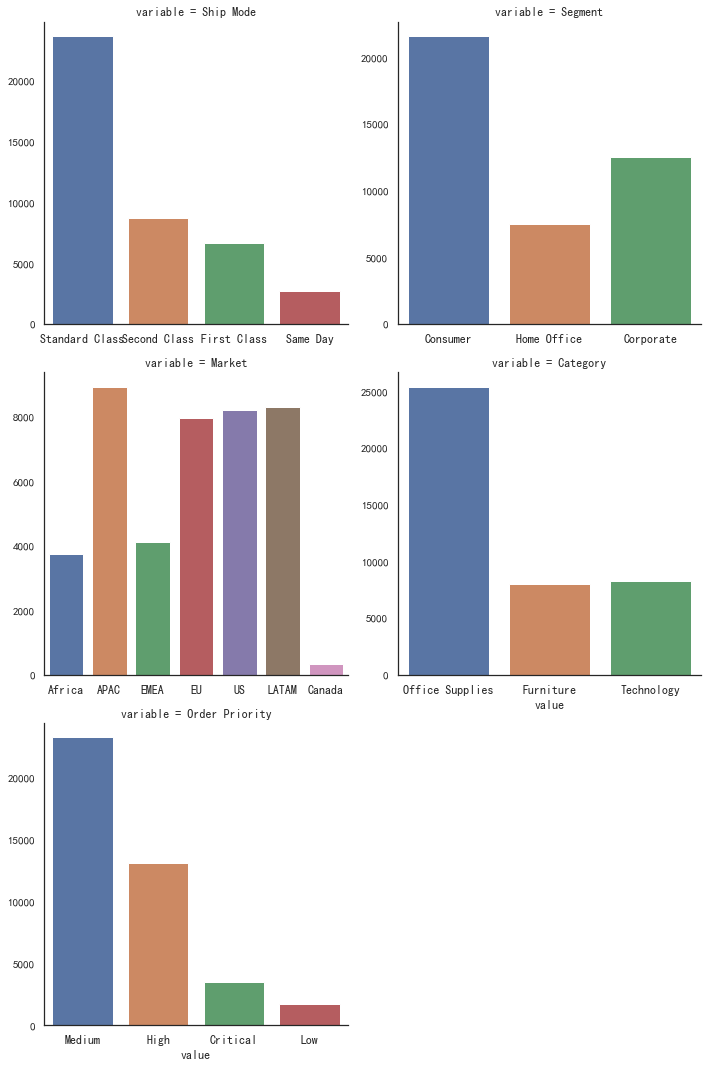

In [19]:
def count_plot(x, **kwargs):
    sns.countplot(x=x)
    plt.xticks(size=12)

m = pd.melt(df, value_vars=categorical_features_2)
g = sns.FacetGrid(m, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, 'value')

从上图各个类别变量频数分布可以看出:

- 运送方式最多的是Standard Class即标准级，最少的为Same Day即当日达。考虑到顾客下单时对快递到达日的期望不同，如果顾客无特殊需求，则采用标准级运输方式，节省运输成本，导致大部分运送方式均为标准级。
- 顾客类型最多的为“消费者”，大概占比50%，其次是“公司法人”，占比最少为“在家办公人员”。主要面向人群为“消费者”（这里消费者的含义与我们的认知可能不同，这里将其理解为具有某一特征的人群），在选择渠道投放时，可以优先投放用户群体主要为“消费者”的渠道。接下来可以结合销售维度，针对不同类型的顾客进行消费评估。
- 订单主要来自亚太地区、欧盟、美国、拉丁美洲，其他的如非洲、中东、除欧盟外欧洲国家、加拿大订单量较少。可以看出我们的市场主要面向亚太、欧盟、美国和拉丁美洲，或者说这些市场的顾客对我们产品更加依赖，这是我们重点要关注的市场。
- 顾客订单的类型主要是办公用品，占比60%以上，可见我们的办公用品比较受欢迎，如羊皮纸、剪刀、荧光笔、图钉、橡皮筋等，而家具和技术类销售情况对比办公用品并不好。
- 从订单紧急情况来看，大部分为中等，这也和我们的运送方式，最多的就是标准级相对应，紧急订单很少，与我们的当日达订单量相当。针对紧急情况为高的订单，对照运送方式来看，我们选择的是头等级或二等级运送，符合用户对运送的期望。

#### 销售额柱状图

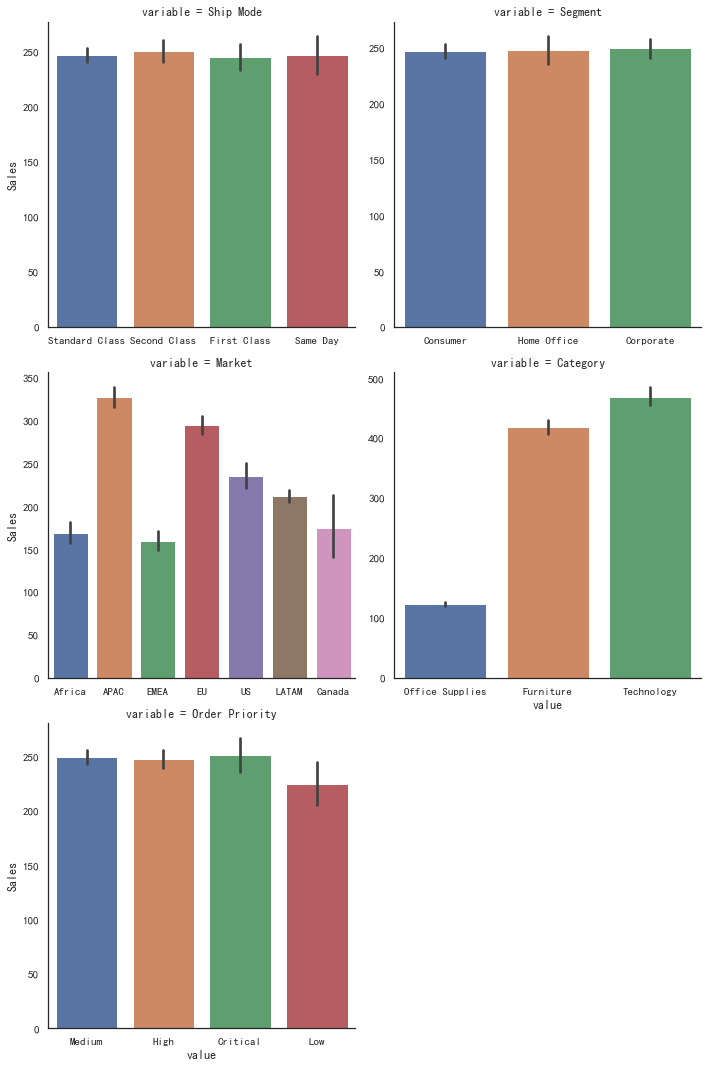

In [20]:
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    
m = pd.melt(df, id_vars=['Sales'], value_vars=categorical_features_2)
g = sns.FacetGrid(m, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, 'value', 'Sales')

从不同特征的单均销售额来看，有一下现象：
- 不同送达方式、不同顾客类型的单均销售额几乎相同。
- 订单优先级为紧急的订单，单均销售额稍高一点，订单优先级最差的订单，单均销售额最低，但是相差并不大，以上三个维度的单均销售额并没有发现有价值的sight
- 从市场的角度来看单均销售额，发现最高的为亚太地区，其次为欧盟、美国、拉丁美洲，与上面探索不同类别的订单频数相对应，可见我们最需要重点关注的区域是亚太地区，该地区的订单量最多，同时单均销售额也是最高的，可见亚太地区贡献了最大一部分的GMV，其次运营的次重点为欧盟和美国。加拿大订单量非常少（前面探索的结果），同时订单金额虽然不是最低，但是也偏低，只有170的样子，远低于亚太地区单均销售额325，如果我们目前主抓GMV流水的话，则不应过多关注加拿大。另外非洲、中东、欧洲除欧盟以外的国家，这些地区的消费水平略低一些，也不是重点关注的市场。
- 从类别来看，办公用品的单均销售额只有120左右，而技术和家具类的产品单均销售额在400-500之间，结合到前面的订单量来看，三大类的GMV占比应该为三足鼎立，可见，虽然办公用品的订单量非常多，但是办公用品多为小件，金额并不高。后续可探索一下各类型的利润情况

#### 每单利润箱线图

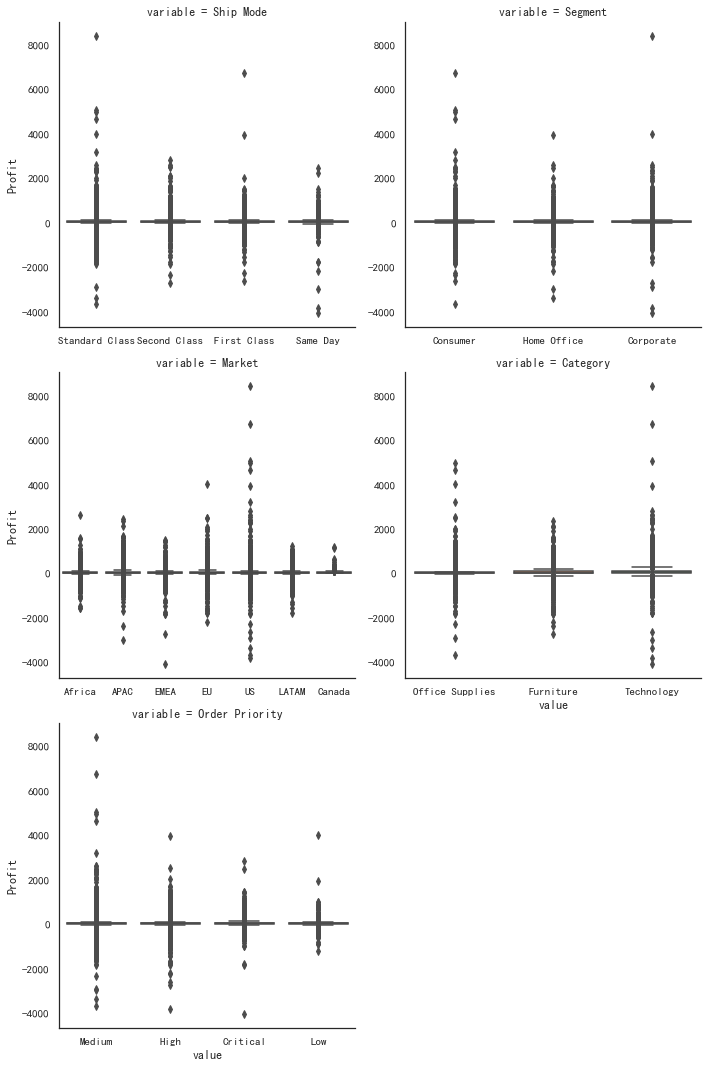

In [21]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    
m = pd.melt(df, id_vars=['Profit'], value_vars=categorical_features_2)
g = sns.FacetGrid(m, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value', 'Profit')

从每单利润情况来看：
- 每单利润非常离散，盈利单与亏损单相差不大，可见该超市经常会进行促销活动
- 存在商品亏损非常严重的单，每单亏损超过2000元，原因可能是商品库存挤压，商品贬值导致

接下来看一下亏损单占比

In [22]:
print('亏损单占比: {:.2%}'.format(df[df['Profit'] < 0].shape[0] / len(df)))

亏损单占比: 24.59%


In [23]:
df['Profit'].describe()

count    41603.000000
mean        28.978534
std        176.031722
min      -4088.376000
25%          0.000000
50%          9.120000
75%         36.630000
max       8399.976000
Name: Profit, dtype: float64

可以看出，亏损单占比很大，最多的一单亏损了4000多元，但这里是针对类别特征探索，不进行展开分析

#### 每单折扣情况小提琴图

In [24]:
df['Discount'].describe()

count    41603.000000
mean         0.143623
std          0.212539
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: Discount, dtype: float64

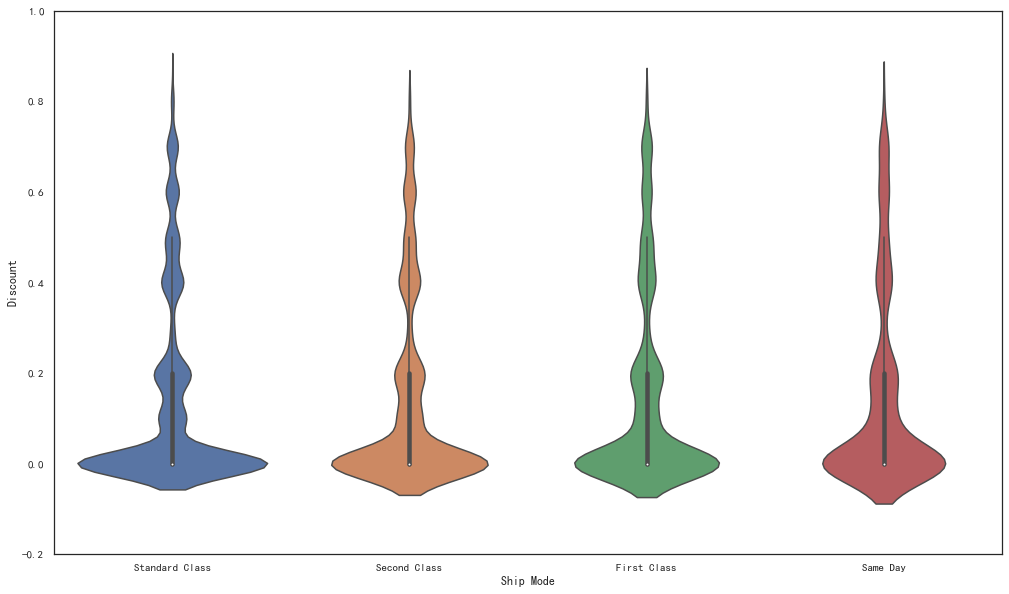

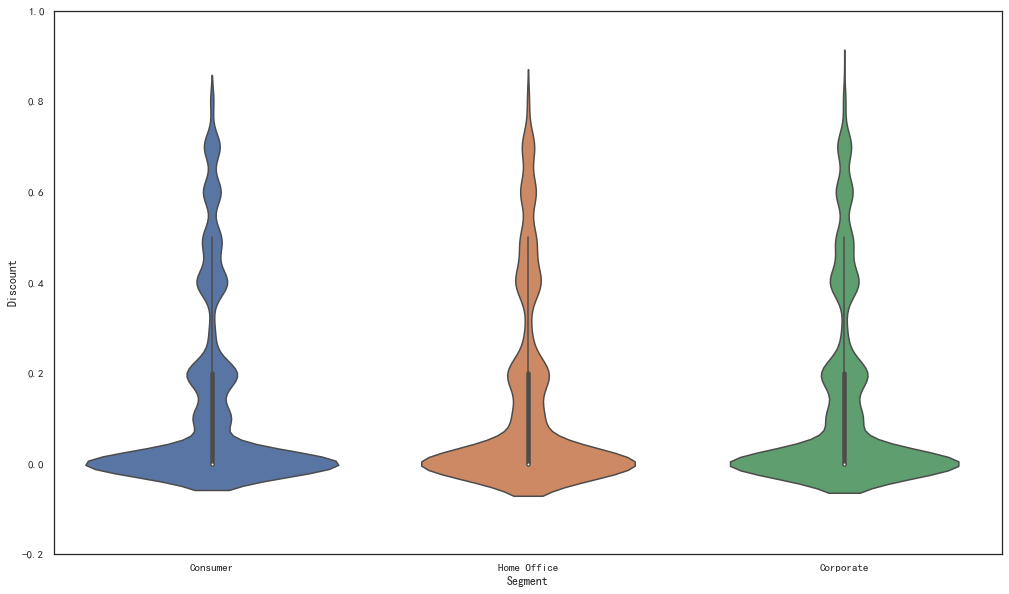

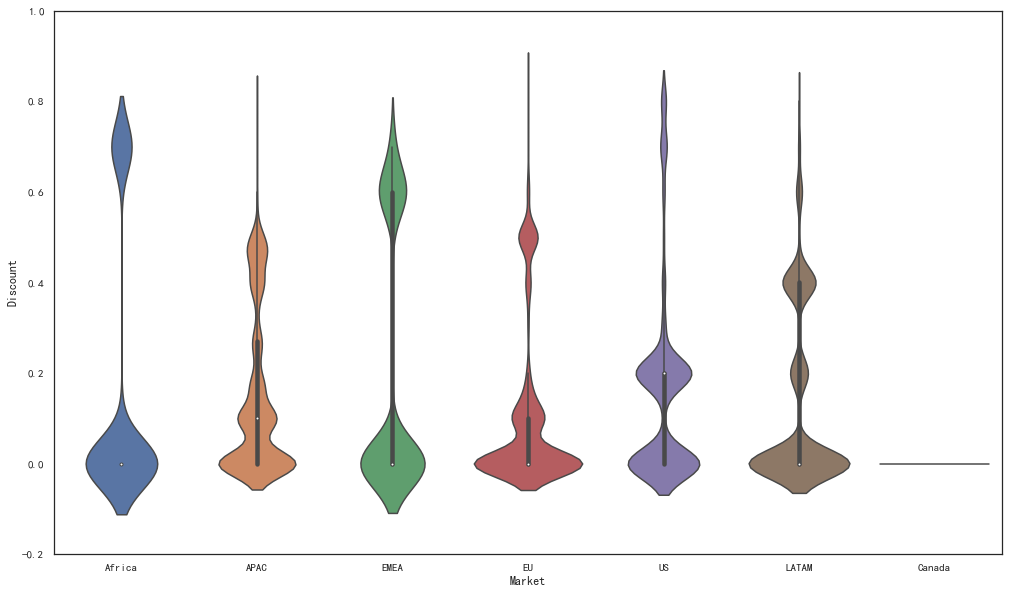

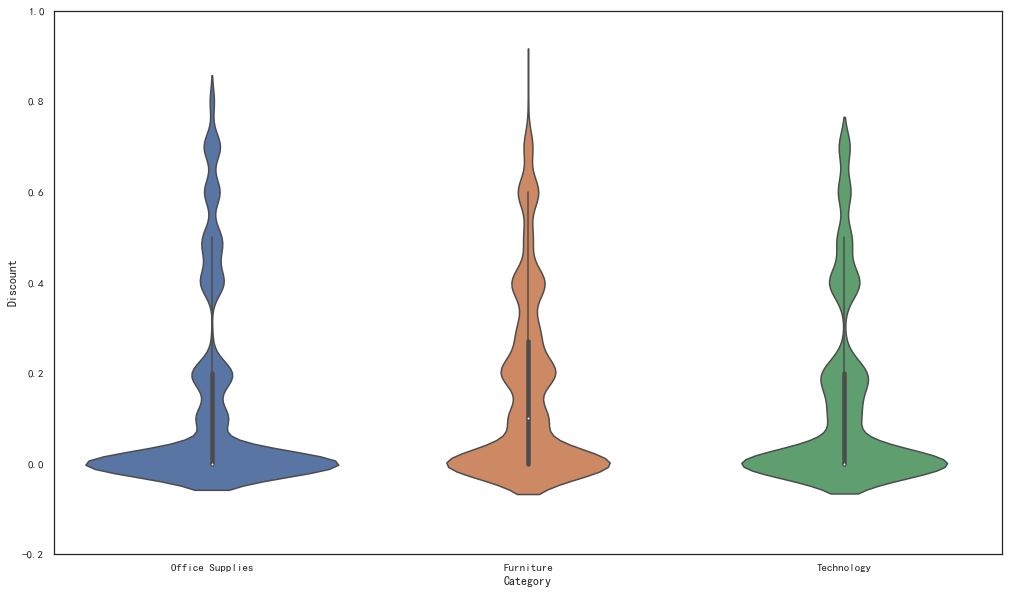

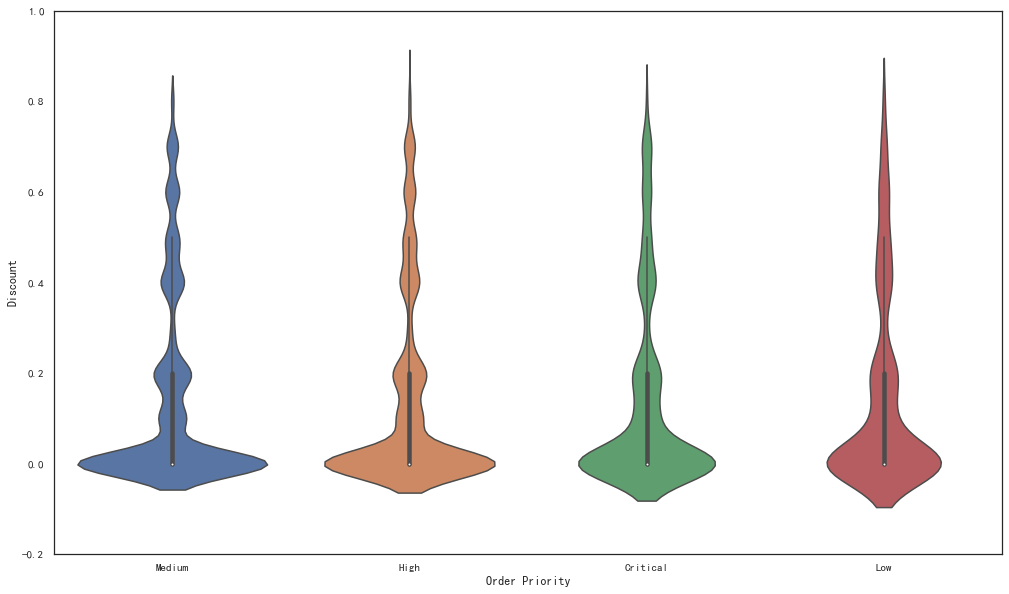

In [25]:
for catg in categorical_features_2:
    sns.violinplot(x=catg, y=df['Discount'], data=df)
    plt.ylim([-0.2,1])
    plt.show()

从每单折扣情况的小提琴图来看:
- 各送达方式、顾客类型、订单优先级，每单折扣分布类似，都是0折扣的最多，越往上越少，并无异常
- 从商品类别角度看，办公用品和技术类的折扣很低，0折扣的最多，而家具类折扣较多，中位数是0.1的折扣，折扣最高的订单也出自家具类，可能与家具类产品市场竞争严重，我们产品优势不足等有关
- 从地区角度看，亚太单的折扣中位数是0.1，而美国的折扣中位数是0.2，其他均为0。亚太地区和美国是我们订单的主要来源，这可能与我们的促销活动有关，不同的是，美国地区的订单折扣集中在0-0.2之间，0.6-0.8的折扣也有一些，并不多，而亚太地区的折扣分布在0-0.6之间，高折扣的订单有不少。
- 加拿大订单量少，可能与我们没有针对此地区做促销活动有关，加拿大的订单均没有折扣。
- 欧盟的订单质量不错，主要折扣都集中在0-0.2之间，这也是我们订单的主要来源地之一，这可能原因是当地居民对价格敏感度较低。
- 非洲、中东和欧洲除欧盟之外的国家，订单折扣分布呈现两极化，除了正常的低折扣订单，还出现了非常多的高折扣订单（0.5折以上），可见欠发达的地区对折扣是比较敏感的。初步判断这两地并不是我们要主要发展的地区。

#### 每单运费柱状图

In [26]:
df['Shipping Cost'].describe()

count    41603.000000
mean        27.072233
std         58.744228
min          0.000000
25%          2.660000
50%          7.960000
75%         25.090000
max        933.570000
Name: Shipping Cost, dtype: float64

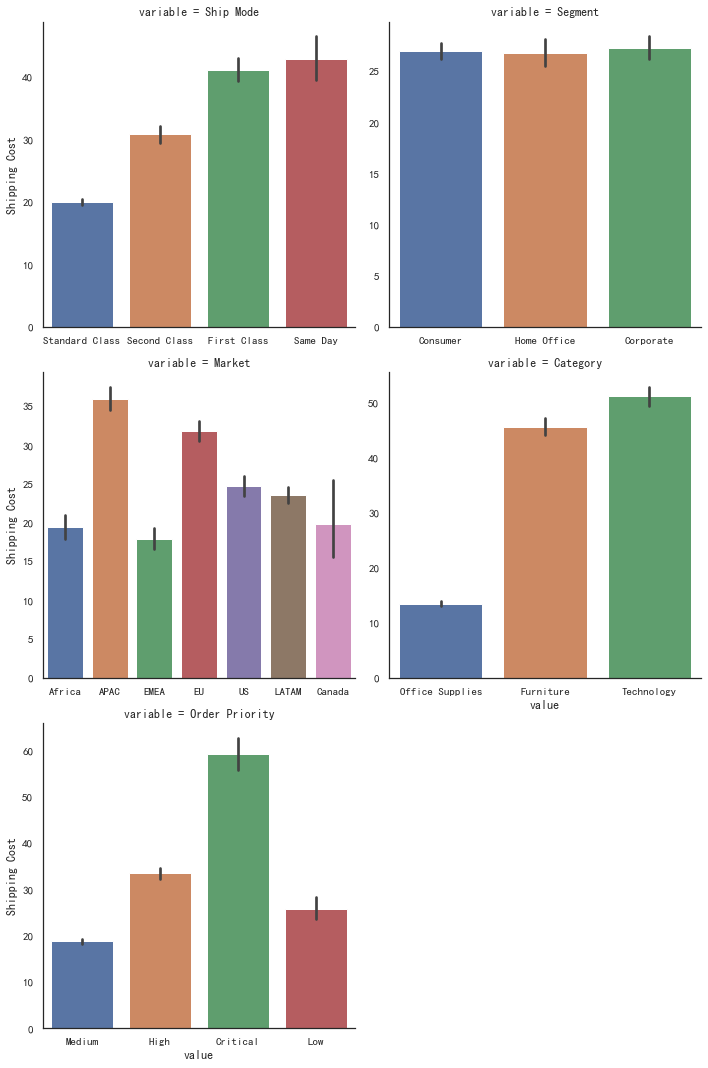

In [27]:
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    
f = pd.melt(df, id_vars=['Shipping Cost'], value_vars=categorical_features_2)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, 'value', 'Shipping Cost')

从每单运费柱状图可以看出:
- 不同商品的运输费很悬殊，可以看出办公用品体积小，重量轻，运输费平均只有13元左右，而家具类和技术类运输成本高，分别为45元、51元附近。
- 订单配送方式越效率，运费越贵。从订单来看，紧急程度越高的订单，自然就选择越效率的配送方式，运费自然就高，订单优先级最低的订单，运费反而比优先级为中等的订单高，可能原因是此类订单订购的家具和技术类商品比例较高。
- 不同市场单均运费差异也较大，最高的为亚太地区，36元附近，而非洲和中东等地运输成本不到20元。这受我们商场与市场的距离有关，还可能受不同地区人力成本的影响。

### 数字特征分析

#### 每个数字特征的分布

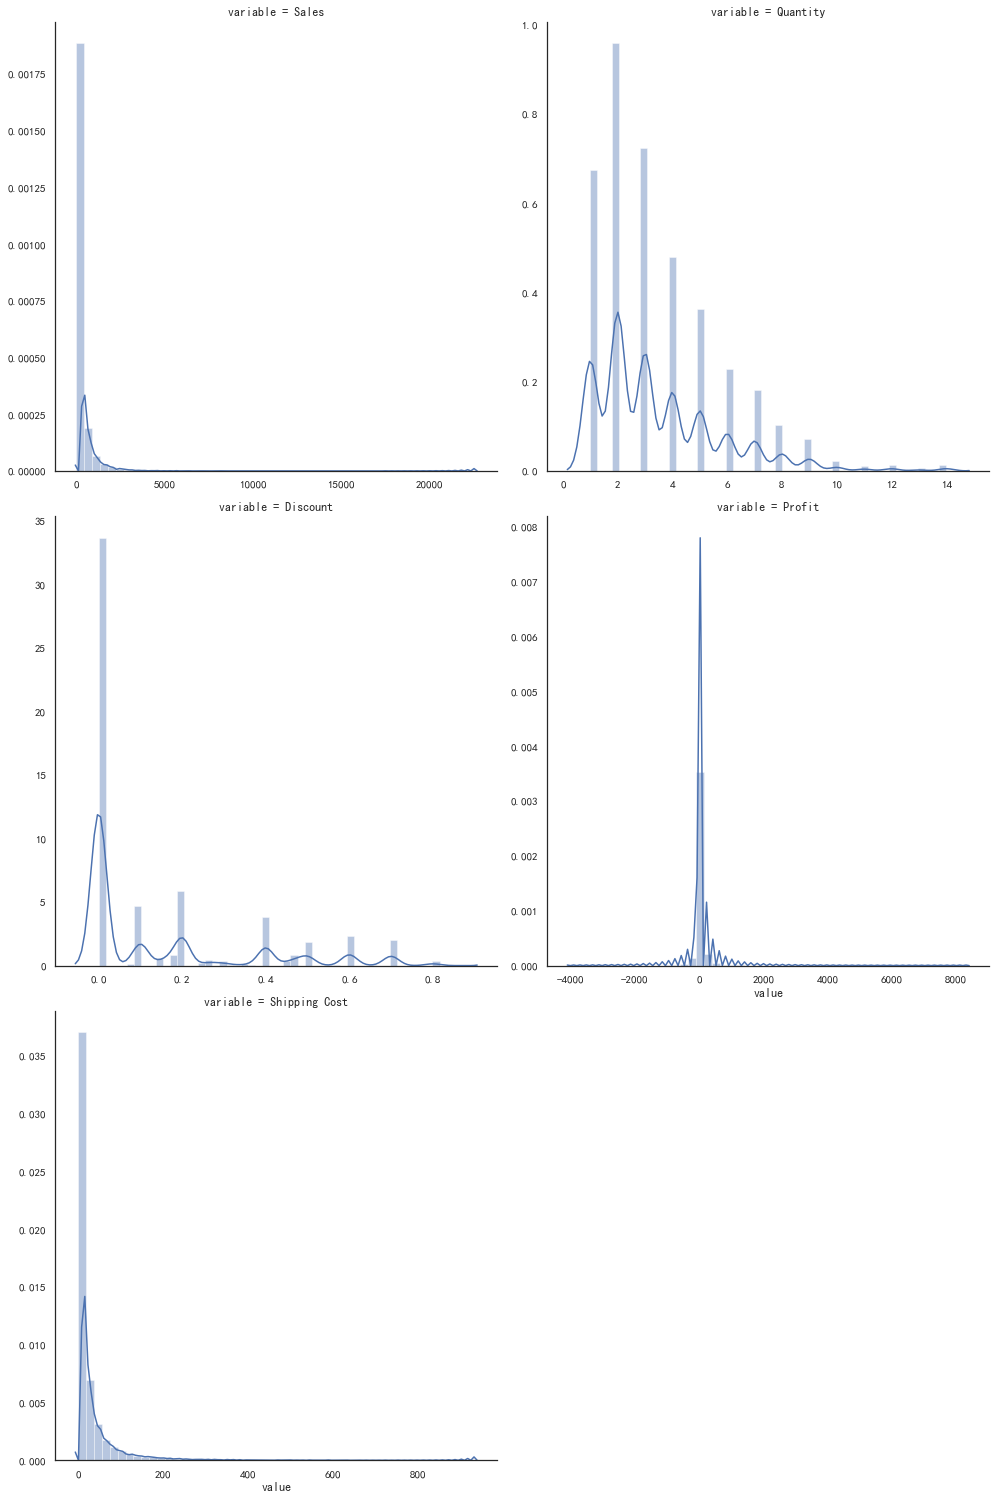

In [28]:
f = pd.melt(df, value_vars=numeric_features)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size=7)
g = g.map(sns.distplot, 'value')

从数字特征的分布可以看出：
- 订单金额偏度很大，属于右偏态分布，集中在低金额订单，高金额订单较少。
- 由于每条记录是同一件商品，可以看出我们的商品需求量还是比较大的，每单购买此商品2件的最多，只购买1件的订单占比较低，最多的一单购买14件相同的产品
- 0折扣的商品最多，但是也存在不少0.5折以上的高折扣商品
- 从每单盈利的分布来看，并不是太注重利润，商城可能处于成长期，需要积累大量用户，通过低价来吸引用户。

In [29]:
# 每个数字特征的偏度和峰度
for col in numeric_features:
    print('{:15}'.format(col), 'Skewness: {:.2f}'.format(df[col].skew()), '  ', 
         'Kurtosis: {:.2f}'.format(df[col].kurt()))

Sales           Skewness: 8.69    Kurtosis: 196.80
Quantity        Skewness: 1.35    Kurtosis: 2.24
Discount        Skewness: 1.38    Kurtosis: 0.70
Profit          Skewness: 6.02    Kurtosis: 287.04
Shipping Cost   Skewness: 5.81    Kurtosis: 48.72


#### 数字特征的相关性

In [30]:
correlation = numeric_features.corr()
print(correlation['Sales'].sort_values(ascending=False))

Sales            1.000000
Shipping Cost    0.757511
Profit           0.500631
Quantity         0.309434
Discount        -0.085889
Name: Sales, dtype: float64


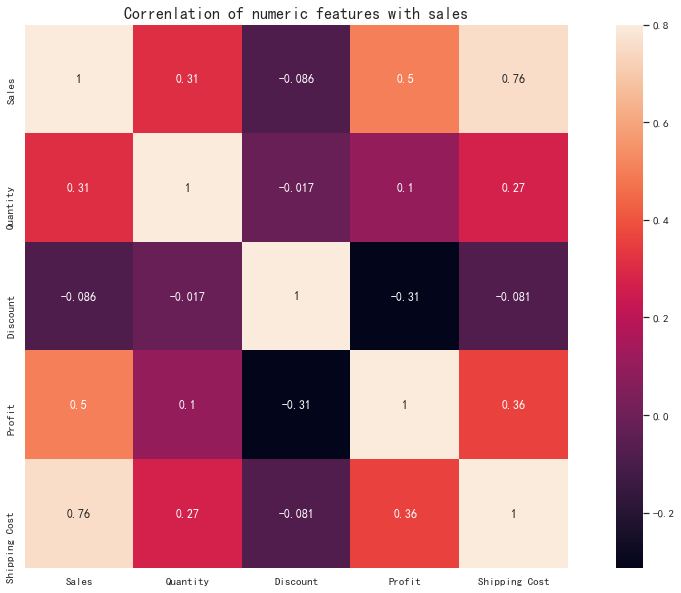

In [31]:
plt.title('Correnlation of numeric features with sales', size=16)
sns.heatmap(correlation, square=True, annot=True, vmax=0.8)

从各数字特征的相关性来看：
- 与销售额相关性最强的是运输成本，呈正相关，相关系数0.76
- 其次是利润，呈正相关，相关系数0.5
- 商品数量呈弱相关，与折扣几乎无关

#### 数据特征相互之间的关系可视化

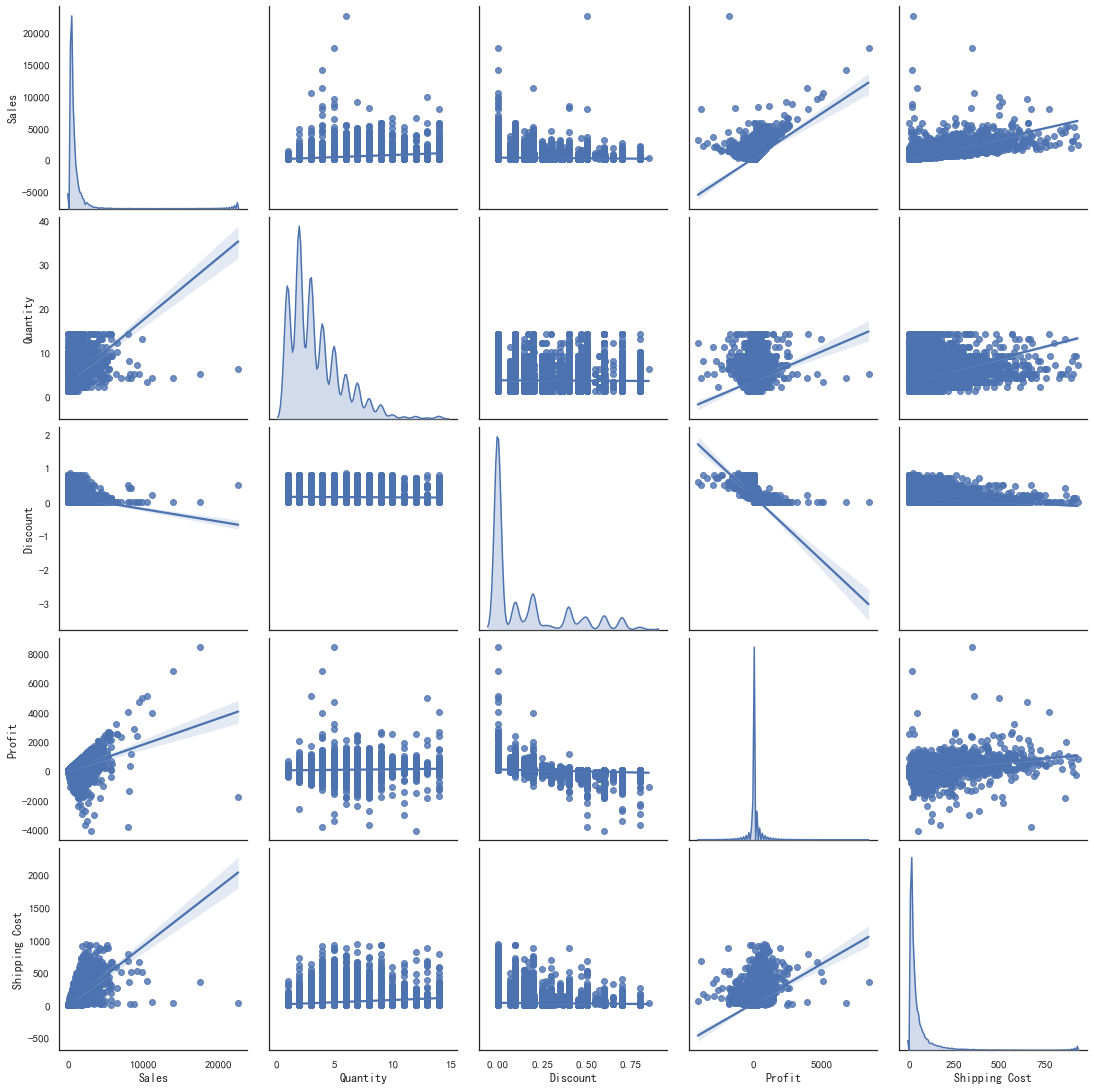

In [32]:
sns.pairplot(df[numeric_features.columns], size=3, kind='reg', diag_kind='kde')

每单销售额与运输成本相关性较强，运输成本高，即商品体积大，重量沉，可能订单的商品数量多，导致销售额增长

# 经营分析


In [33]:
# 对订单按照Order Date日期排序
df.sort_values(by='Order Date', ascending=True, inplace=True, na_position='first')

# 添加年和月的列，进行年度和月度销售分析
from datetime import datetime
dt = df['Order Date'].astype(str)
dt = dt.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
df['month'] = dt.map(lambda x: x.month)
df['year'] = dt.map(lambda x: x.year)

## 销售额分析

In [34]:
# 创建销售额透视表
sales = pd.pivot_table(df, values='Sales', index='month', columns='year',aggfunc=[np.sum])
sales.columns = ['2011年','2012年','2013年','2014年']
sales.index=['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']
sales

,2011年,2012年,2013年,2014年
1月,136164.76042,160833.95938,203348.35782,255805.49140
2月,133059.69814,149074.29794,173406.43844,232872.18286
3月,159266.25128,189714.10184,213622.29518,326298.28036
4月,115762.88984,171272.28768,214721.42188,277891.88526
5月,128817.83294,196950.12012,247527.79712,262146.37094
6月,160414.73012,209437.35092,288604.02772,324154.56872
7月,146586.96470,161207.87582,186251.08704,229437.76950
8月,168916.97044,207963.50596,254799.14208,361178.35852
9月,185182.49276,194485.60582,263481.87684,293281.29872
10月,147624.81570,175863.10014,173103.77954,293499.84094


### 年度销售额及增长率

In [35]:
rise_12 = (sales.sum()[1]-sales.sum()[0])/sales.sum()[0]
rise_13 = (sales.sum()[2]-sales.sum()[1])/sales.sum()[1]
rise_14 = (sales.sum()[3]-sales.sum()[2])/sales.sum()[2]
rise_rate = [0, rise_12, rise_13, rise_14]

sales_sum=pd.DataFrame({'Sales_sum':sales.sum()})
sales_sum['rise_rate'] = rise_rate
sales_sum.index=pd.Series(['2011年','2012年','2013年','2014年'])
sales_sum

,Sales_sum,rise_rate
2011年,1.872866e+06,0.000000
2012年,2.211701e+06,0.180918
2013年,2.712267e+06,0.226326
2014年,3.504394e+06,0.292053


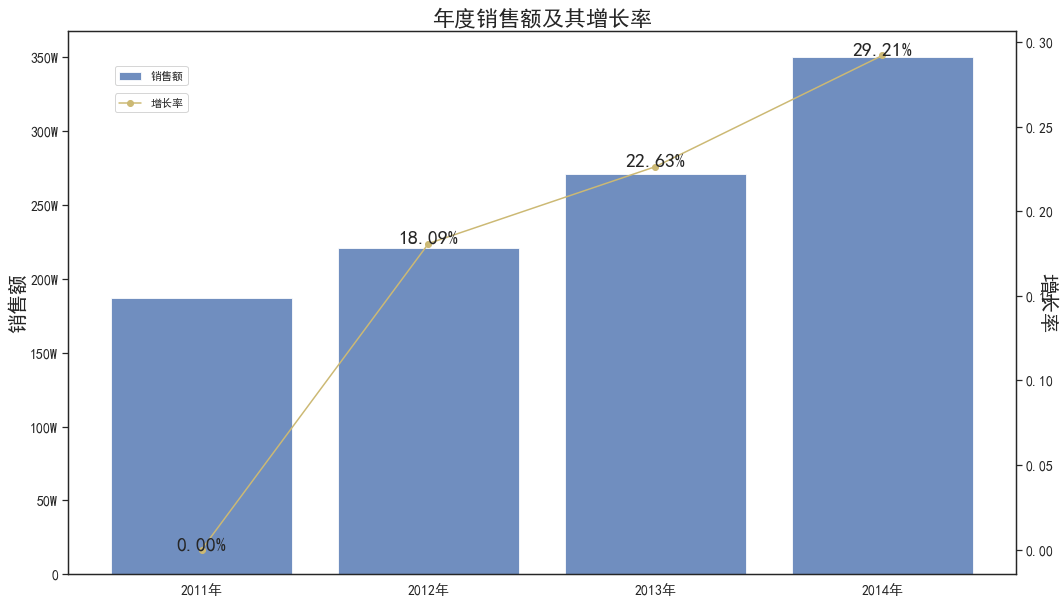

In [36]:
x1 = sales_sum.index
x2 = sales_sum.index
y1 = sales_sum.Sales_sum
y2 = sales_sum.rise_rate

# 建立左侧纵坐标画板
fig, ax1 = plt.subplots()
# 画柱状图
bar = ax1.bar(x1, y1, alpha=0.8, label = '销售额')
# 显示左侧纵坐标
ax1.set_ylabel('销售额', fontsize=20)
plt.yticks(range(0,4000000,500000),('0','50W','100W','150W','200W','250W','300W','350W'))
ax1.legend(bar, ("销售额",), loc = [0.05, 0.9])
plt.tick_params(labelsize=14)

# 建立右侧坐标画板
ax2 = ax1.twinx()
# 画折线图
line = ax2.plot(x2, y2, marker='o' ,c='y')
# 折线图显示标识
for a, b in zip(x2, y2):  
    ax2.text(a, b, "%.2f" % (100 * b) + '%', ha='center', fontsize=20)  
ax2.set_ylabel('增长率', fontsize=20, rotation=270)
ax2.legend(line, ('增长率',), loc = [0.05, 0.85])
plt.tick_params(labelsize=14)

ax2.set_title("年度销售额及其增长率", fontsize=22)
plt.show()

从年度销售额及其增长率来看:
- 该超市2011年销售额只有190万，2014年销售额达到了350万，GMV提升非常快
- 据了解，全球领先的办公用品供应商包括：Costco、Office Depot、Staples、Tesco和沃尔玛，查询沃尔玛2014年销售额得知，沃尔玛2014年销售额为4731亿美元，可见与全球大型超市对比，差距还是很大
- 但是从增长率来看，增长率逐年提升，而且提升率非常高，13-14年GMV增长率接近30%，而沃尔玛2013-2014的增长率大概为3%，所以该超市潜力非常大
- 结合用户基数看，将销售额与增长率放在一起看，沃尔玛等大型超市用户基数大，所以增长率会放缓，并不能因为我们增长率远高于沃尔玛等大型超市就沾沾自喜
- 后续可以结合销售额及增长率，在结合公司的战略规划，进行下一年度销售额的预测


### 每年月度销售额及增长率

In [37]:
sales

,2011年,2012年,2013年,2014年
1月,136164.76042,160833.95938,203348.35782,255805.49140
2月,133059.69814,149074.29794,173406.43844,232872.18286
3月,159266.25128,189714.10184,213622.29518,326298.28036
4月,115762.88984,171272.28768,214721.42188,277891.88526
5月,128817.83294,196950.12012,247527.79712,262146.37094
6月,160414.73012,209437.35092,288604.02772,324154.56872
7月,146586.96470,161207.87582,186251.08704,229437.76950
8月,168916.97044,207963.50596,254799.14208,361178.35852
9月,185182.49276,194485.60582,263481.87684,293281.29872
10月,147624.81570,175863.10014,173103.77954,293499.84094


#### 销售额面积堆叠图

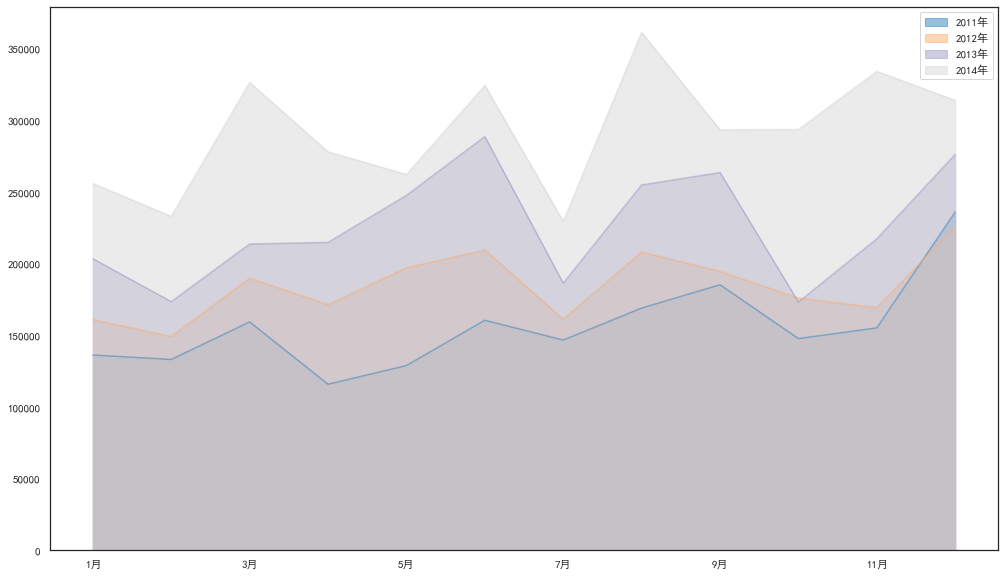

In [38]:
sales.plot.area(colormap = 'tab20c', stacked=False)

从每年月度销售额面积堆叠图来看：
- 销售季节性并不明显，总体都处于波动状态
- 但是有些月份，比如2月、4月、7月、10月这四个月份属于销售的淡季，可以结合产品特点进行新产品拓展，举办促销活动等方式来吸引客户
- 每年的3月、6月、9月、12月属于销售的旺季，可能这几个月份办公用品之类的商品需求量大，这几个月我们的运营推广策略做的比较好，可以计算相关活动的ROI，如果表现不错，可以加大投入，提高销售额

#### 每月销售额的同比增长率

In [39]:
rise=pd.DataFrame()
rise['rise_2012']=(sales['2012年']-sales['2011年']) / sales['2011年']
rise['rise_2013']=(sales['2013年']-sales['2012年']) / sales['2012年']
rise['rise_2014']=(sales['2014年']-sales['2013年']) / sales['2013年']
rise.style.background_gradient(cmap='Blues',axis=1,low=0,high=1)

,rise_2012,rise_2013,rise_2014
1月,0.181172,0.264337,0.257967
2月,0.120357,0.163222,0.342927
3月,0.191176,0.126022,0.527454
4月,0.479509,0.253685,0.294197
5月,0.528904,0.256804,0.059058
6月,0.305599,0.377997,0.123181
7月,0.099742,0.155347,0.231873
8月,0.231158,0.225211,0.417502
9月,0.050238,0.354763,0.113099
10月,0.191284,-0.015690,0.695514


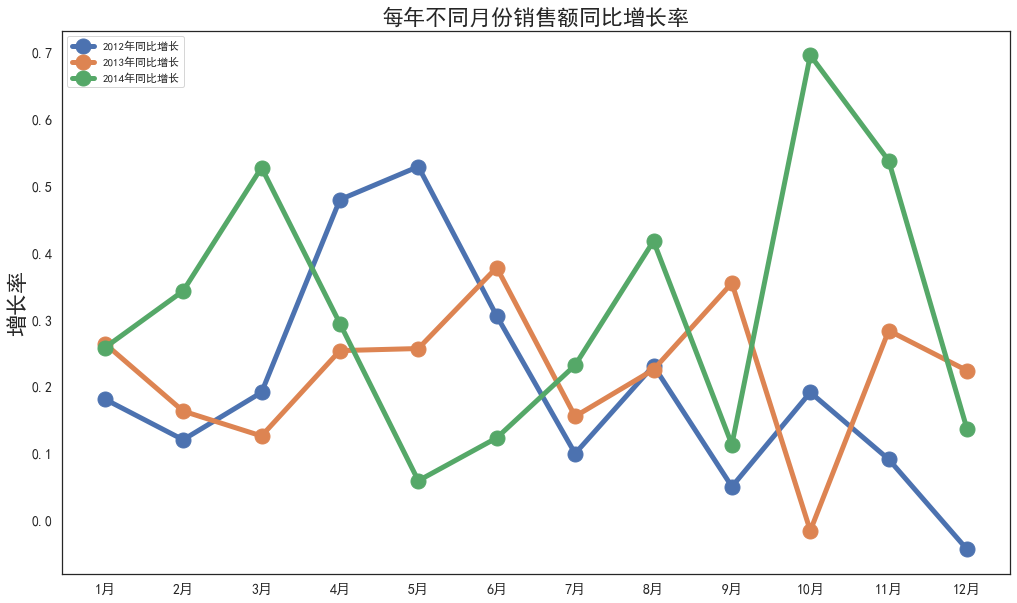

In [40]:
plt.plot(rise.index, rise.rise_2012,linewidth=5, marker='o',ms=15,label='2012年同比增长')
plt.plot(rise.index, rise.rise_2013,linewidth=5, marker='o',ms=15,label='2013年同比增长')
plt.plot(rise.index, rise.rise_2014,linewidth=5, marker='o',ms=15,label='2014年同比增长')
plt.ylabel('增长率',fontsize=22)
plt.title('每年不同月份销售额同比增长率', size=22)
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

从每年不同月份的同比增长来看:
- 2012年同比增长率最高的月份为4月、5月，这两个月增长率均在50%左右，可以对这两个月的活动做一个复盘，找到做的好的部分，应用于后续的活动
- 2013年每月的同比增长率差不多，但10月份出现了负数的增长率，这也是唯一一个负增长，需要结合当时的运营情况来具体分析
- 2014年整体增长率非常高，最高的10月份同比增长了近80%，可以看出，超市总结出了去年10月同比增长率为负数的原因，并在今年的10月份进行了改进
- 但是总体来看，同比增长率没有什么规律，下一年度同比增长率的业绩指标制定起来会有一定困难

## 利润分析

In [41]:
# 创建利润透视表
profit = pd.pivot_table(df, values='Profit', index='month', columns='year',aggfunc=[np.sum])
profit.columns = ['2011年','2012年','2013年','2014年']
profit.index=['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']
profit

,2011年,2012年,2013年,2014年
1月,13151.75442,19350.98538,25398.47852,29136.72090
2月,17560.70724,17337.07794,29174.68864,28002.02046
3月,15481.80388,22016.53684,32455.29038,47364.19716
4月,11927.11654,17072.40708,23209.07418,33400.10596
5月,12823.94224,22660.38482,32458.84272,27179.24594
6月,22742.32632,27754.52582,34488.86732,35745.83002
7月,9021.18940,20563.38972,22133.82904,24155.48660
8月,18317.00444,25799.36156,27006.42558,39825.84182
9月,27396.23206,17898.74932,17305.19014,36075.24992
10月,20148.47510,21892.29984,22208.73084,39724.33154


### 年度利润及增长率

In [42]:
# 计算利润增长率
rise_12 = (profit.sum()[1] - profit.sum()[0]) / profit.sum()[0]
rise_13 = (profit.sum()[2] - profit.sum()[1]) / profit.sum()[1]
rise_14 = (profit.sum()[3] - profit.sum()[2]) / profit.sum()[2]
rise_rate = [0, rise_12, rise_13, rise_14]

# 计算每年的利润率
rate_11 = profit.sum()[0] / sales.sum()[0]
rate_12 = profit.sum()[1] / sales.sum()[1]
rate_13 = profit.sum()[2] / sales.sum()[2]
rate_14 = profit.sum()[3] / sales.sum()[3]
profit_rate = [rate_11, rate_12, rate_13, rate_14]

profit_sum = pd.DataFrame({'Profit_sum': profit.sum()})
profit_sum['rise_rate'] = rise_rate
profit_sum['profit_rate'] = profit_rate
profit_sum.index = pd.Series(['2011年', '2012年', '2013年', '2014年'])
profit_sum

,Profit_sum,rise_rate,profit_rate
2011年,211072.52954,0.000000,0.112700
2012年,249979.46060,0.184330,0.113026
2013年,333630.14506,0.334630,0.123008
2014年,410911.82756,0.231639,0.117256


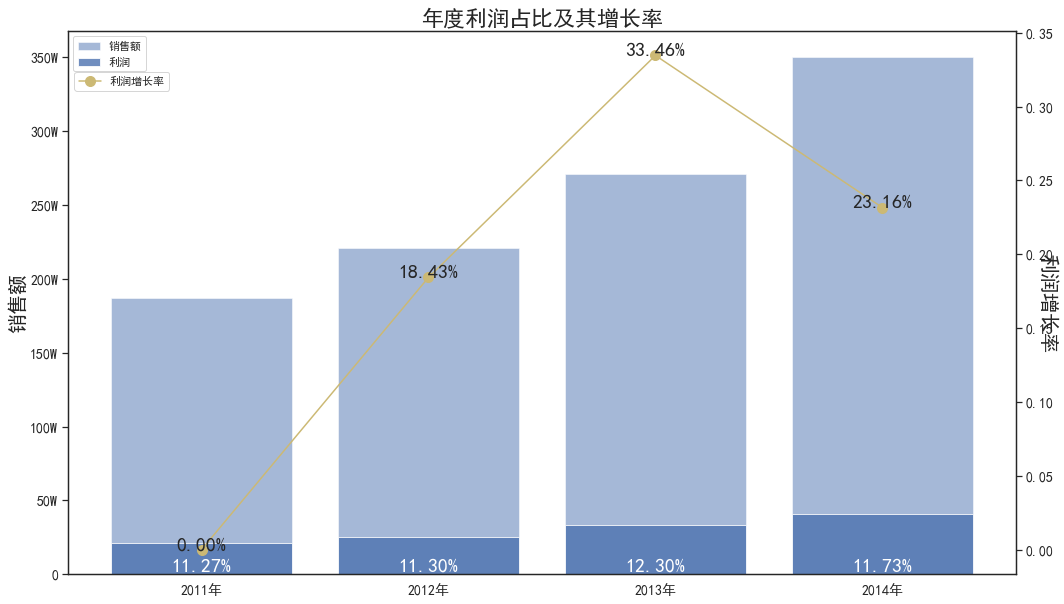

In [43]:
# 建立左侧纵坐标画板
fig, ax1 = plt.subplots()
# 画堆叠图
s = plt.bar(sales_sum.index,sales_sum.Sales_sum, alpha=0.5, label='销售额')
p = plt.bar(profit_sum.index, profit_sum.Profit_sum,color='b' ,alpha=0.8, label='利润')
# 显示左侧纵坐标
ax1.set_ylabel('销售额', fontsize=20)
plt.yticks(range(0,4000000,500000),('0','50W','100W','150W','200W','250W','300W','350W'))
plt.tick_params(labelsize=14)
# 显示文字
for x1,y1 in zip(profit_sum.index, profit_sum.profit_rate):
    plt.text(x1, y1+20000, '%.2f%%'% (y1*100), ha='center', color='w',fontsize=20)
plt.legend()
# 建立右侧坐标画板
ax2 = ax1.twinx()
# # 画折线图
line = ax2.plot(profit_sum.index, profit_sum.rise_rate, marker='o' ,c='y',ms=10)
# # 折线图显示标识
for a, b in zip(profit_sum.index, profit_sum.rise_rate):  
    ax2.text(a, b, "%.2f" % (100 * b) + '%', ha='center', fontsize=20)  
ax2.set_ylabel('利润增长率', fontsize=20, rotation=270)
plt.tick_params(labelsize=14)
ax2.set_title("年度利润占比及其增长率", fontsize=22)
ax2.legend(line, ('利润增长率',), loc = [0.007, 0.89])
plt.show()

从各年度利润及利润增长率可以看出：
- 利润是在逐年递增，利润率平稳位置在11.3%-12.3%之间，说明超市的经营策略比较完善
- 营业额2012,2013,2014的增长率是18%, 22%，30%左右，从图中利润的增长情况来看，2012年两者的增长是相同的，说明2012年延续了上一年的经营策略，没有进行太多的调整；而2013年营业额增长22%，但利润增长了33%，从图中也可以看出，2013年的利润率变高了，是唯一一年利润率超过12%的年度，2013年该超市应该是改变了策略，想抓盈利情况；但该超市2014年又进行了策略的变动，营业额增长了30%，而利润只增长了23%，证明2014年的战略主方向是扩大销售额，可能进行了比较多的促销让利


### 每年月度利润及增长率

#### 利润面积堆积图

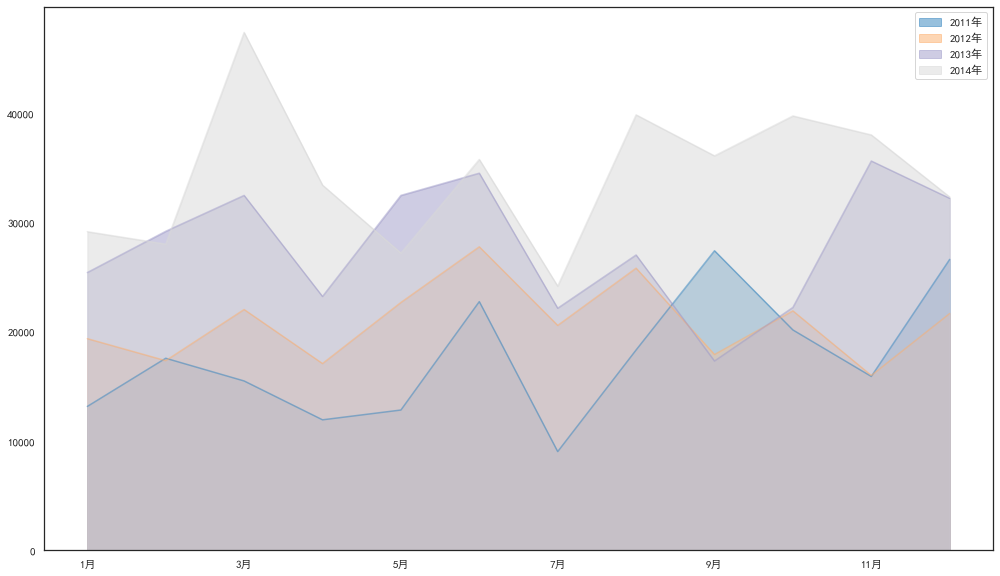

In [44]:
profit.plot.area(colormap = 'tab20c', stacked=False)

从上图每年不同月份的利润堆积图来看：
- 总体来说，利润是增长的，说明超市是在不断发展壮大的
- 但利润波动很大，情况比较复杂，不同月份的利润情况并不是随着每年超市营业额的增加（前面探索发现）而增加，不少月份的利润是不如前一年对应月份的
- 原因可能是公司处于成长期，重点在于用户盘子的扩大，并不是非常注重盈利情况

#### 每月利润的同比增长率

In [45]:
rise_2=pd.DataFrame()
rise_2['rise_2012']=(profit['2012年']-profit['2011年']) / profit['2011年']
rise_2['rise_2013']=(profit['2013年']-profit['2012年']) / profit['2012年']
rise_2['rise_2014']=(profit['2014年']-profit['2013年']) / profit['2013年']
rise_2.style.background_gradient(cmap='Blues',axis=1,low=0,high=1)

,rise_2012,rise_2013,rise_2014
1月,0.471362,0.312516,0.147184
2月,-0.012735,0.682792,-0.040195
3月,0.422091,0.474132,0.459368
4月,0.431394,0.359449,0.439097
5月,0.767037,0.432405,-0.162655
6月,0.220391,0.242639,0.036445
7月,1.279454,0.076371,0.091338
8月,0.408492,0.046787,0.474680
9月,-0.346671,-0.033162,1.084649
10月,0.086549,0.014454,0.788681


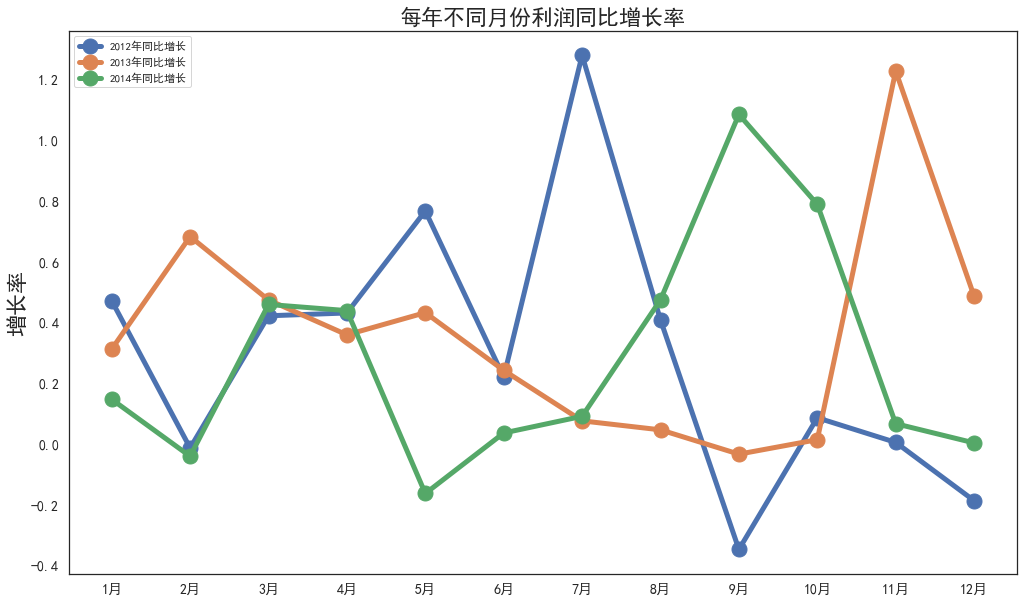

In [46]:
plt.plot(rise_2.index, rise_2.rise_2012,linewidth=5, marker='o',ms=15,label='2012年同比增长')
plt.plot(rise_2.index, rise_2.rise_2013,linewidth=5, marker='o',ms=15,label='2013年同比增长')
plt.plot(rise_2.index, rise_2.rise_2014,linewidth=5, marker='o',ms=15,label='2014年同比增长')
plt.ylabel('增长率',fontsize=22)
plt.title('每年不同月份利润同比增长率', size=22)
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

从每一年不同月份的利润同比增长率来看：
- 2012年7月出现了峰值，同比增长超过120%，经查询，11年7月份利润很低，不到1万，而12年7月，该超市应该吸取了去年失败的教训，在今年7月份进行了运营调整，利润超过了2万
- 每年都有同比增长率是负数的情况，也印证了刚才的观点，该公司并不是非常重视盈利情况，这与公司的发展阶段和战略布局有关，比如我国的京东，毛利率就不高，去掉运营费用，管理费用，履约费用等，利润率常年负数，但依然越做越大

## 客单价

In [47]:
unit_price = pd.pivot_table(df,values=['Sales'],index=['month'],columns=['year'],aggfunc=[np.mean])
unit_price.columns = ['2011','2012','2013','2014']
unit_price

,2011,2012,2013,2014
month,,,,
1,223.955198,260.670923,261.373211,247.633583
2,256.872004,245.187990,242.526487,240.322170
3,269.486043,246.062389,257.686725,257.333029
4,215.172658,265.538431,256.536944,237.514432
5,257.635666,241.953465,248.023845,233.226309
6,238.004051,233.747043,236.173509,231.208680
7,244.719474,244.254357,220.676643,239.746886
8,256.323172,257.380577,249.070520,278.902207
9,273.938599,244.022090,221.972938,238.246384


这里客单价采取的计算方式为：有效订单总金额 / 成交订单总笔数，这里发现每一年不同月份的客单价的波动非常小，因此并没有进行可视化
- 客单价稳定在200-300之间，证明我们的运营稳定，今年商品结构没有发生太大的变动
- 如果想要提高客单件的，可以在促销时，赠送顾客一些满399才能使用的一些折扣券，让顾客多购买一些商品是常用的策略
- 提高客单价的另一个方式是增加单个订单内商品的数量，但考虑到该超市主要商品类型是办公用品类型的，商品消耗周期较长，可操作性不大，唯一可操的就是设置购买商品数量越多，折扣越大，从而降低商品的单价，增加顾客购买更多件商品的欲望

## 不同市场连带率分析

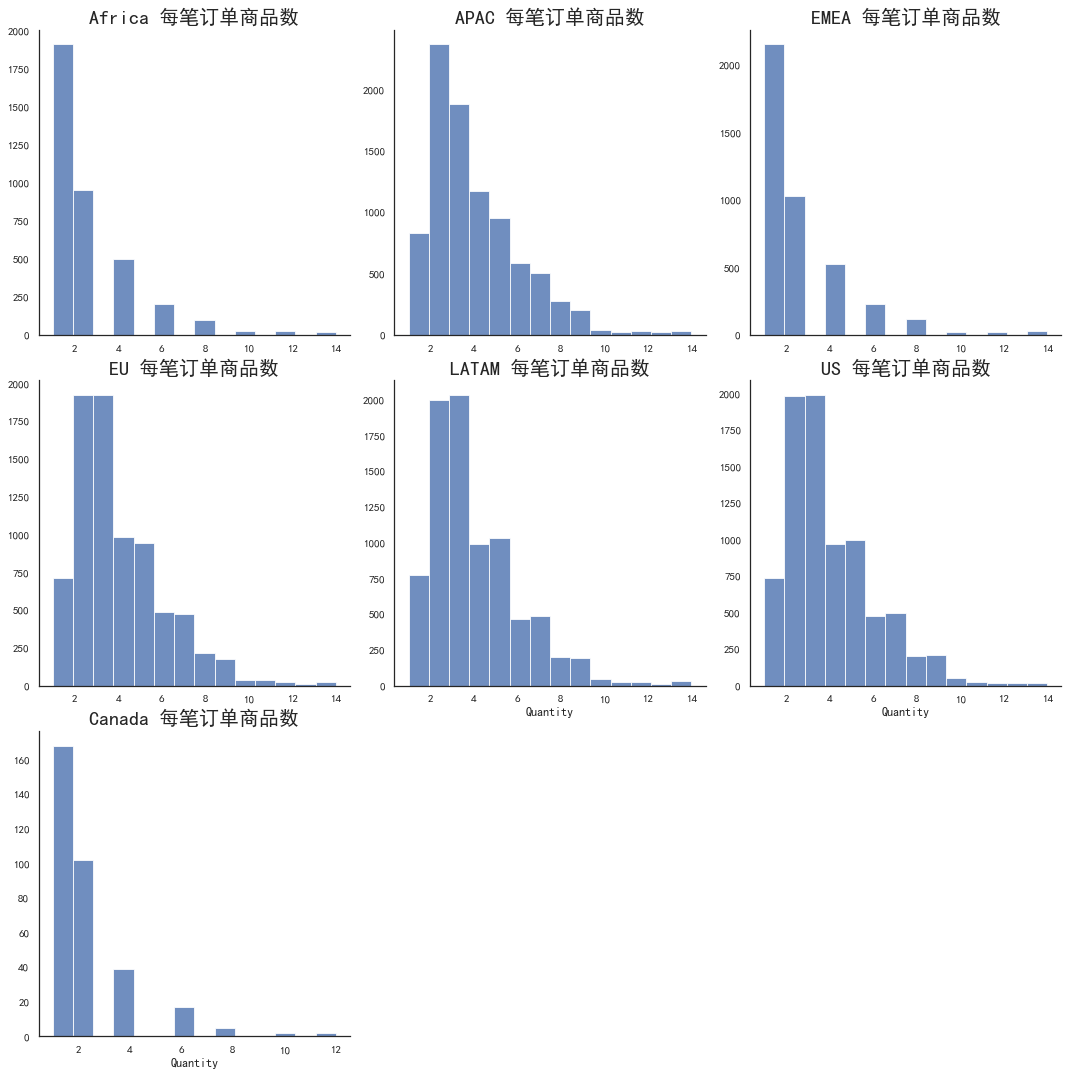

In [48]:
g = sns.FacetGrid(df, col="Market",col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(plt.hist, "Quantity", bins=df.Quantity.nunique(),alpha=0.8).set_titles("{col_name} 每笔订单商品数",size=20)


从不同市场每单商品数量直方图可以看出：
- 依然是亚太地区、欧盟、美国、拉丁美洲四个地区的连带率会更高，每单商品数量为2、3、4、5的订单比订单里只有一件商品的订单还多，这是重点关注和发力的四个地区
- 而非洲、中东、加拿大的订单大多数都是只有一件商品，连带率低，可以结合超市的战略进行取舍

## 促销活动分析

In [49]:
# 定义折扣等级,便于后续分析不同折扣带来的销售额和利润
bins=[-0.01,0.01,0.2,0.5,1]
df['discount_level'] = pd.cut(df.Discount, bins=bins, labels=['无折扣','低折扣','中折扣','高折扣'])

In [50]:
# 创建不同折扣等级的销售额,利润DataFrame
dis_s_p = df.groupby('discount_level')['Sales','Profit'].sum()
dis_s_p

,Sales,Profit
discount_level,,
无折扣,5.898705e+06,1.494713e+06
低折扣,2.828127e+06,3.712265e+05
中折扣,1.269121e+06,-3.271357e+05
高折扣,3.052762e+05,-3.332101e+05


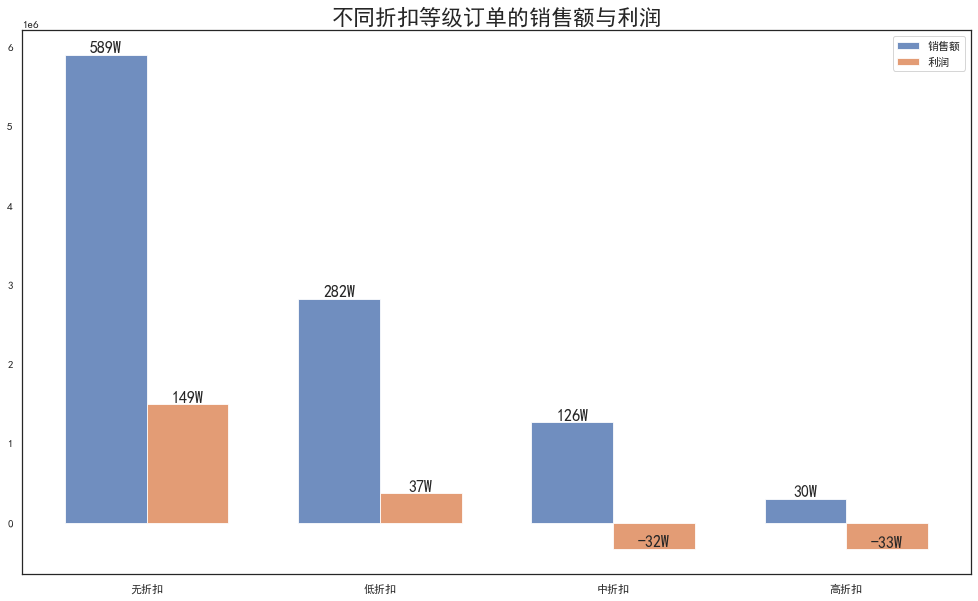

In [51]:
index = np.arange(dis_s_p.shape[0])
rects1=plt.bar(x=index, height=dis_s_p.Sales, width=0.35, label='销售额',alpha=0.8)
rects2=plt.bar(x=index + 0.35, height=dis_s_p.Profit, width=0.35, label='利润',alpha=0.8)
plt.xticks(index +0.175, dis_s_p.index)
plt.legend()
plt.title('不同折扣等级订单的销售额与利润',size=22)

def add_labels(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, '%d' % (height/10000) + 'W', ha='center', va='bottom',size=16)

add_labels(rects1)
add_labels(rects2)
plt.show()

Text(0.5, 1.0, '不同市场不同折扣等级订单销售额')

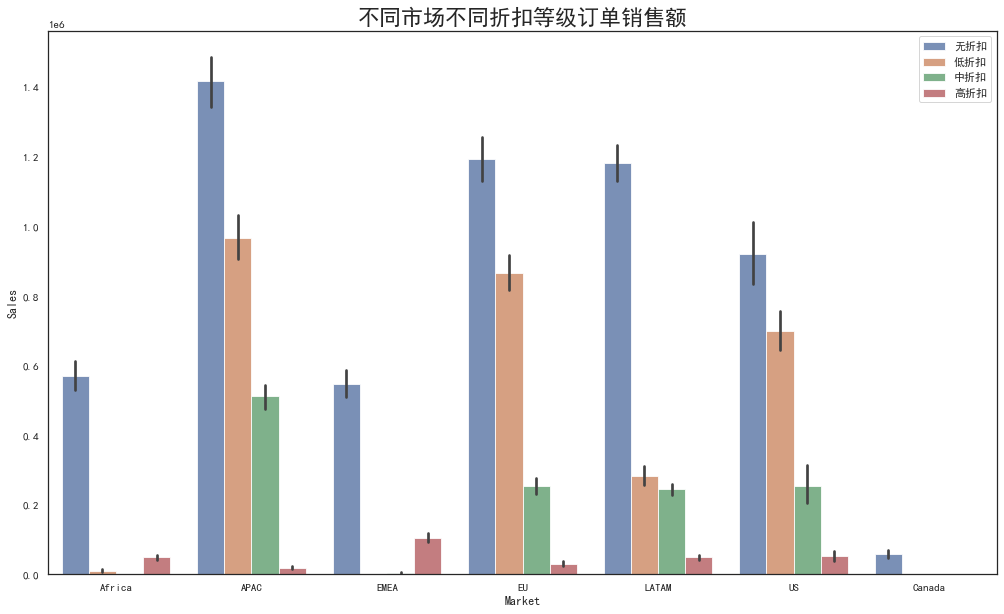

In [52]:
sns.barplot(x='Market', y='Sales', data=df, hue='discount_level',estimator=np.sum,alpha=0.8)
plt.legend(loc='upper right')
plt.title('不同市场不同折扣等级订单销售额',size=22)

从上面两张图可以看出：
- 经过计算，无折扣订单利润大约是销售额的25%，低折扣订单利润大约是销售额的13%，而折扣力度在0.2-0.5之间的订单，已经是负利润了，超过0.5折扣比例的订单，几乎是销售额多少，就亏损多少
- 高折扣的订单可能是因为商品积压导致贬值，被迫亏本甩卖，应及时对商品结构进行诊断，对于难销售，易积压的商品，及时调整进货策略
- 但是打折也分好和坏两方面，利润确实有损，但是打折带来了销售额的增加，并且有可能为企业带来新的客户
- 看不同地区对于折扣的敏感度可以看出，优质地区依然是那几个，而在加拿大我们可能没有促销活动，非洲和中东等地，占比最大的是无折扣，可能因为商品的刚需所导致，而低折扣和中折扣几乎吸引不到他们，这两种折扣力度的订单几乎没有，只有高折扣的订单，才能吸引到他们下单，建议调整市场策略

## 不同商品销售额与利润

In [53]:
# 创建不同商品销售额与利润情况
cg_s_p = df.groupby(['Category','Sub-Category'])['Sales','Profit'].sum()
cg_s_p

Sales        Profit
Category        Sub-Category                            
Furniture       Bookcases     1.193550e+06  134025.94800
                Chairs        1.229097e+06  114871.05580
                Furnishings   3.085302e+05   37751.16040
                Tables        6.053700e+05  -46067.85950
Office Supplies Appliances    8.386693e+05  115736.49500
                Art           3.027286e+05   46972.42050
                Binders       3.890102e+05   61664.15370
                Envelopes     1.385974e+05   23845.25330
                Fasteners     6.647102e+04    9032.92240
                Labels        5.752862e+04   11563.98180
                Paper         2.021229e+05   49126.75920
                Storage       9.167182e+05   86051.56290
                Supplies      1.995056e+05   16940.51350
Technology      Accessories   6.077972e+05  106793.66260
                Copiers       1.229569e+06  215754.69376
                Machines      6.375567e+05   51375.72420
                Phones        1.378408e+06  170155.51520

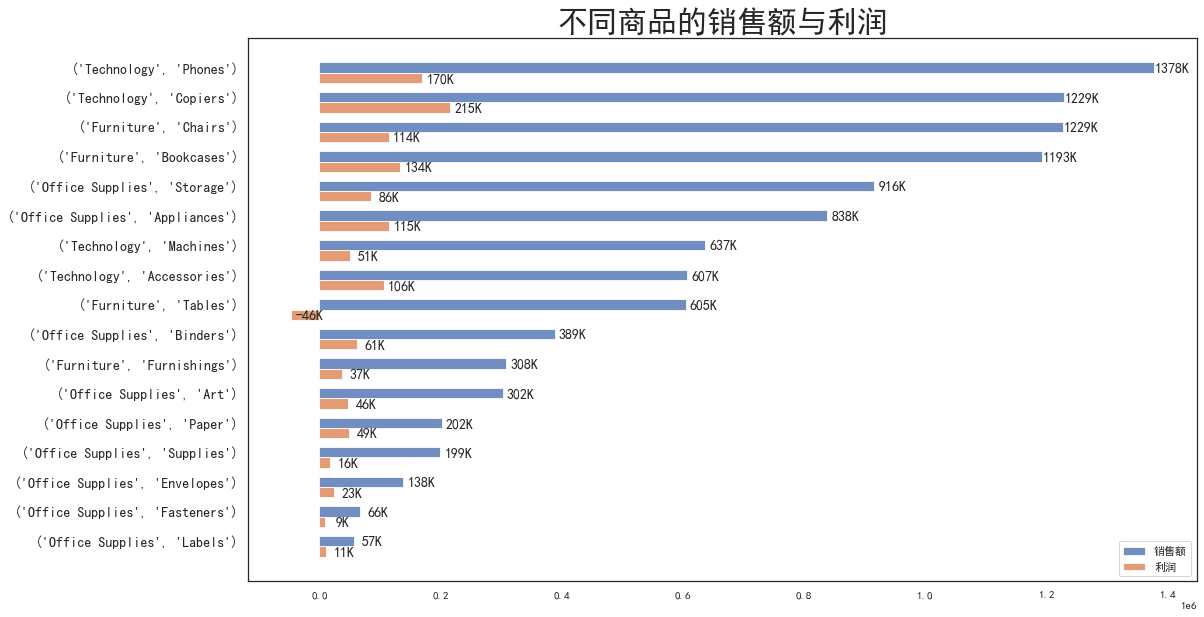

In [54]:
sortIndex = np.argsort(cg_s_p.Sales)  # 倒序，返回排序后各数据的原始下标
x_sort = cg_s_p.index[sortIndex]  # 重新进行排序，与y保持初始顺序一致
y_sort = cg_s_p.Sales[sortIndex]  # 重新进行排序，倒序
y_sort2 = cg_s_p.Profit[sortIndex]

rects1=plt.barh(np.arange(len(x_sort)), width=y_sort,height=0.35,alpha=0.8,label='销售额')
rects2=plt.barh(np.arange(len(x_sort)) - 0.35, width=y_sort2, height=0.35, label='利润',alpha=0.8)
plt.yticks(np.arange(len(x_sort)), x_sort, fontsize=14)
plt.legend()
plt.title('不同商品的销售额与利润',size=30)

def add_labels(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(width+30000, rect.get_y(), '%d' % (width/1000) + 'K', ha='center',size=14)

    
add_labels(rects1)
add_labels(rects2)
plt.show()

In [55]:
df[df['Sub-Category'].isin(['Phones','Copiers','Chairs','Bookcases','Storage'
                            ,'Appliances','Machines','Accessories','Tables'])].Sales.sum() / df.Sales.sum()

0.8384178777917103

从不同商品销售额与利润可以看出：
- furniture(家具类)中Bookcases(书柜)、Chairs(椅子)、Tables(桌子)；Office supplies(办公用品)中Appliances(电器)、Storage(储藏箱)；Technology(技术类)中Accessories(附件)、Copiers(复印机)、Machines(机器)、Phones(电话)，是销售额最好的产品，这几类产品占了销售额总额的84%。这是该超市的主营产品类别，可以制定一些战略来提高我们超市在顾客心智中对这几类产品的认知，提高这几类商品就能想到我们超市，从而提高我们的品牌影响力
- 销售额较少的几类产品，inders(粘合剂)、Furnishings(家具)、Art(艺术品)、Paper(纸)、Supplies(供应品)、Envelopes(信封)、Fasteners(紧固件)、Labels(标签)均是办公用品中的小物件，可以探索顾客购买商品的连带关系，进行组合销售优化
- Tales(桌子)是唯一负利润的产品，出现此状况的原因可能是清理库存或者是市场竞争大，需要结合实际业务来进行分析，改善此商品结构及经营策略

# 客户RFM模型

在面向客户制定运营策略、营销策略时，我们希望能够针对不同的客户推行不同的策略，实现精准化运营，以期获取最大的转化率。精准化运营的前提是客户关系管理，而客户关系管理的核心是客户分类。

通过客户分类，对客户群体进行细分，区别出低价值客户、高价值客户，对不同的客户群体开展不同的个性化服务，将有限的资源合理地分配给不同价值的客户，实现效益最大化。

In [56]:
dup_f = df.groupby(['Customer ID','Order ID'])['Order Date'].count().reset_index()
dup_f
f = dup_f.groupby('Customer ID')['Order Date'].count().reset_index()
f

,Customer ID,Order Date
0,AA-10315,18
1,AA-10375,19
2,AA-10480,14
3,AA-10645,32
4,AA-315,5
...,...,...
1581,YS-21880,19
1582,ZC-11910,1
1583,ZC-21910,25
1584,ZD-11925,7


## 基于标准RFM模型方式，分成八类用户

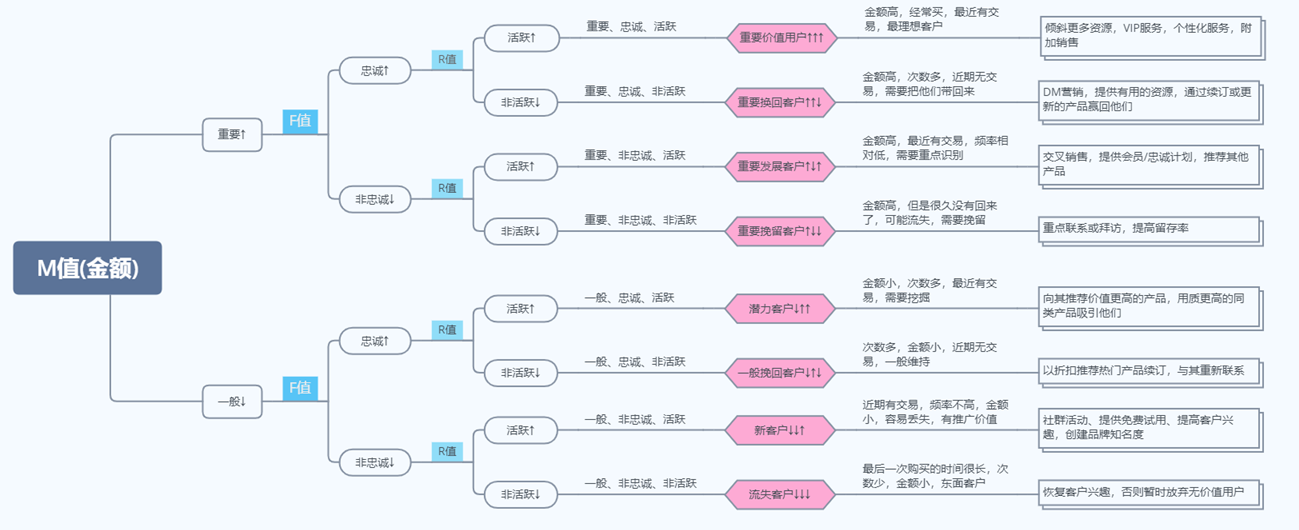

In [57]:
#定义用户类别
def transform_label(x):
    if x == 111:
        label = '重要价值客户'
    elif x == 110:
        label = '潜力客户'
    elif x == 101:
        label = '重要发展客户'
    elif x == 100:
        label = '新客户'
    elif x == 11:
        label = '重要唤回客户'
    elif x == 10:
        label = '一般客户'
    elif x == 1:
        label = '重要挽留客户'
    elif x == 0:
        label = '流失客户'
    return label


df = df[['Order ID','Order Date','Customer ID','Sales']]

r = df.groupby('Customer ID')['Order Date'].max().reset_index()
r['R'] = (pd.to_datetime('2015-1-1') - r['Order Date']).dt.days
r = r[['Customer ID','R']]

#每一条记录代表一种商品，有些订单有多种商品，原始数据会把订单展开成多行，将其算成一次购买记录，即频次算1次
dup_f = df.groupby(['Customer ID','Order ID'])['Order Date'].count().reset_index()
f = dup_f.groupby('Customer ID')['Order Date'].count().reset_index()
f.columns = ['Customer ID','F']

sum_m = df.groupby('Customer ID')['Sales'].sum().reset_index()
com_m = pd.merge(sum_m,f,left_on = 'Customer ID',right_on = 'Customer ID',how = 'inner')

#计算用户平均支付金额
com_m['M'] = com_m['Sales'] / com_m['F']

rfm = pd.merge(r,com_m,left_on = 'Customer ID',right_on = 'Customer ID',how = 'inner')
rfm = rfm[['Customer ID','R','F','M']]

rfm['R-SCORE'] = pd.cut(rfm['R'],bins = rfm['R'].quantile(q=np.linspace(0,1,num=6),interpolation='nearest'),
                        labels = [5,4,3,2,1],right = False).astype(float)
rfm['F-SCORE'] = pd.cut(rfm['F'],bins = rfm['F'].quantile(q=np.linspace(0,1,num=6),interpolation='nearest'),
                        labels = [1,2,3,4,5],right = False).astype(float)
rfm['M-SCORE'] = pd.cut(rfm['M'],bins = rfm['M'].quantile(q=np.linspace(0,1,num=6),interpolation='nearest'),
                        labels = [1,2,3,4,5],right = False).astype(float)

rfm['R>mean'] = (rfm['R-SCORE'] > rfm['R-SCORE'].mean()) * 1
rfm['F>mean'] = (rfm['F-SCORE'] > rfm['F-SCORE'].mean()) * 1
rfm['M>mean'] = (rfm['M-SCORE'] > rfm['M-SCORE'].mean()) * 1

rfm['Score'] = (rfm['R>mean'] * 100) + (rfm['F>mean'] * 10) + (rfm['M>mean'] * 1)

rfm['客户类型'] = rfm['Score'].apply(transform_label)

count = rfm['客户类型'].value_counts().reset_index()
count.columns = ['客户类型','人数']
count['人数占比'] = count['人数'] / count['人数'].sum()

rfm['购买总金额'] = rfm['F'] * rfm['M']
mon = rfm.groupby('客户类型')['购买总金额'].sum().reset_index()
mon.columns = ['客户类型','消费金额']
mon['金额占比'] = mon['消费金额'] / mon['消费金额'].sum()
result = pd.merge(count,mon,left_on = '客户类型',right_on = '客户类型')
result

,客户类型,人数,人数占比,消费金额,金额占比
0,流失客户,420,0.264817,5.010196e+05,0.048637
1,重要价值客户,353,0.222573,5.054523e+06,0.490672
2,新客户,265,0.167087,5.175922e+05,0.050246
3,潜力客户,227,0.143127,1.906880e+06,0.185112
4,重要挽留客户,130,0.081967,5.272846e+05,0.051187
5,重要发展客户,99,0.062421,7.479362e+05,0.072607
6,重要唤回客户,52,0.032787,7.313618e+05,0.070998
7,一般客户,40,0.025221,3.146314e+05,0.030543


### 顾客分层结构分析
 - 用户画像
 - 价值用户对销售额的贡献

In [58]:
# 这里为了美观和交互性，使用pyecharts做南丁格尔玫瑰图，需要将numpy.int转化成python原生态int
customer_category_sum = []
for i in result['人数'].values:
    customer_category_sum.append(int(i))
customer_list = [list(z) for z in zip(result['客户类型'], customer_category_sum)]
customer_list

[['流失客户', 420],
 ['重要价值客户', 353],
 ['新客户', 265],
 ['潜力客户', 227],
 ['重要挽留客户', 130],
 ['重要发展客户', 99],
 ['重要唤回客户', 52],
 ['一般客户', 40]]

In [59]:
from pyecharts.charts import Grid, Pie, Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
# 绘制饼图
pie = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.MACARONS,bg_color='white'))
    .add('',customer_list,
     radius=['30%','75%'],
     rosetype='radius',
     label_opts=opts.LabelOpts(is_show=True))
    .set_global_opts(title_opts=opts.TitleOpts(title='顾客分层结构',pos_left='center'),
                     toolbox_opts=opts.ToolboxOpts(is_show=True),
                     legend_opts=opts.LegendOpts(orient='vertical',pos_right='0%',pos_top='30%'))
    .set_series_opts(label_opts=opts.LabelOpts(formatter='{b}:{d}%')))
pie.render_notebook()

从顾客分层结构来看:
- 可以看到无价值的流失客户占据了最大的一部分，这里统计了三年内的用户进行RFM模型构建，可见我们三年时间流失了超过1/4的用户（或者说是沉睡客户），虽然我们的营业额一直在提升，但是也不能掩饰我们流失客户过多的问题
- 做的好的方面是我们的重要价值客户占比非常大,超过了22%，贡献了主要的销售额流水，可以针对他们进行针对性的定制性、个性化服务
- 不过，单纯看占比是没有意义的，因为我们的目的是扩大GMV，因此下面我们再结合消费金额分布情况，来看下我们实际应该针对哪些层级的用户进行精准投放

In [60]:
result.sort_values(by=['消费金额'],ascending=False,inplace=True)
sales_rate=[]; a=0
for i in result.金额占比:
    a +=i
    sales_rate.append(a)
result['金额占比累加'] = sales_rate
result

,客户类型,人数,人数占比,消费金额,金额占比,金额占比累加
1,重要价值客户,353,0.222573,5.054523e+06,0.490672,0.490672
3,潜力客户,227,0.143127,1.906880e+06,0.185112,0.675784
5,重要发展客户,99,0.062421,7.479362e+05,0.072607,0.748390
6,重要唤回客户,52,0.032787,7.313618e+05,0.070998,0.819388
4,重要挽留客户,130,0.081967,5.272846e+05,0.051187,0.870574
2,新客户,265,0.167087,5.175922e+05,0.050246,0.920820
0,流失客户,420,0.264817,5.010196e+05,0.048637,0.969457
7,一般客户,40,0.025221,3.146314e+05,0.030543,1.000000


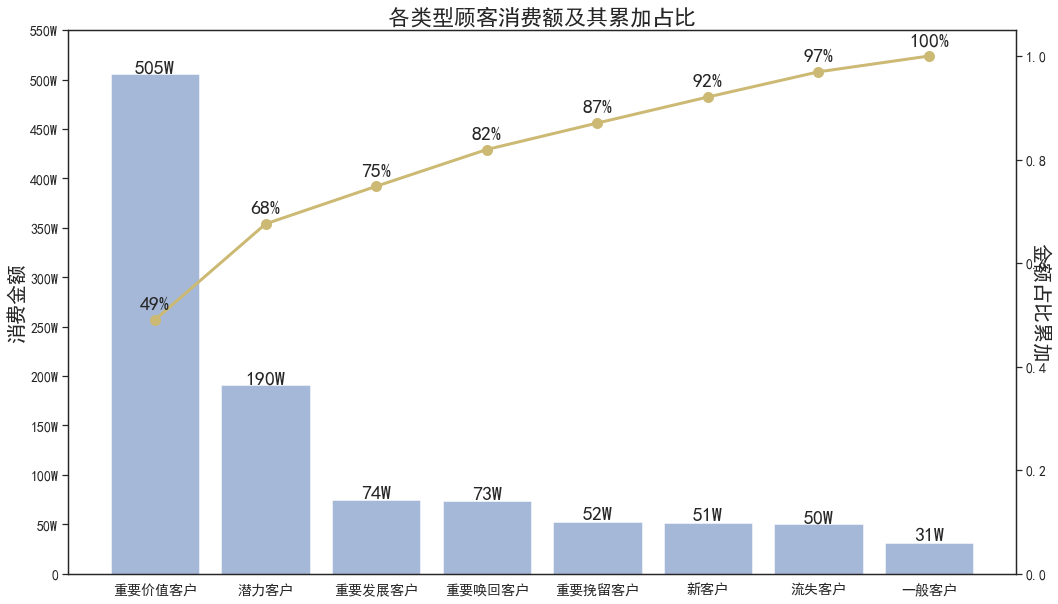

In [61]:
# 建立左侧纵坐标画板
fig, ax1 = plt.subplots()
# 画柱状图图
s = plt.bar(result.客户类型, result.消费金额, alpha=0.5, label='消费金额')
# 显示左侧纵坐标
ax1.set_ylabel('消费金额', fontsize=20)
plt.yticks(range(0,6000000,500000),['0','50W','100W','150W','200W','250W','300W','350W','400W','450W','500W','550W'])
plt.tick_params(labelsize=14)
# 显示文字
for x1,y1 in zip(result.客户类型, result.消费金额):
    plt.text(x1, y1+20000, str(int(y1/10000)) + 'W' , ha='center',fontsize=20)
    
ax2 = ax1.twinx()
# # 画折线图
line = ax2.plot(result.客户类型, result.金额占比累加, linewidth=3,marker='o' ,c='y',ms=10)
# # 折线图显示标识
for a, b in zip(result.客户类型, result.金额占比累加):  
    ax2.text(a, b+0.02, "%.0f" % (100 * b) + '%', ha='center', fontsize=20)  
ax2.set_ylabel('金额占比累加', fontsize=20, rotation=270)
plt.ylim(0,1.05)
plt.tick_params(labelsize=14)
ax2.set_title("各类型顾客消费额及其累加占比", fontsize=22)
plt.show()

从各类型客户和销售额占比可以看出：
- 重要价值客户贡献金额最高，接近50%的比例，可见该超市是有一群稳定的老顾客，经常来超市消费，是销售额的主要来源，重要价值客户和潜力客户，两者占了销售额的68%，而其他6类用户的贡献金额较少，每个类群的客户贡献金额都不超过销售额的10%
- 人数占比最多的流失客户，贡献金额只有5%左右，可见是有一群低质量的用户，后续可以进行渠道跟踪，摒弃用户质量较差的渠道
- 应该着重将运营的重心放在重要价值客户，如何留住核心收入来源的重要价值用户以及通过推荐高质量产品等方法来扩大潜力顾客的购买金额，是现阶段的任务。
- 通过整体的探索发现，此数据集收集的数据显示，该超市4年销售额累计1000万左右，4年共有客户1500余人，可见规模不大，运营能力不会很强，以上图的用户分法并不能很好的去进行分组运营的落地，可以将用户分成三类，重要价值客户、潜力客户、其他客户，针对三类用户群展开不同的运营策略会更容易实行，对这三类不同的客户群体开展不同的个性化服务，将有限的资源合理地分配给不同价值的客户，从而实现效益最大化。


## K-means挖掘价值客户
如上图所示，将用户分为8类，并不能很好的分群实行不同的运营策略，这里再尝试用K-means机器学习算法进行分群


In [62]:
RFM=rfm[['Customer ID','R','F','购买总金额']]
RFM.columns=['CustomerID','Recency','Frequency','Monetary']
RFM.describe()

,Recency,Frequency,Monetary
count,1586.000000,1586.000000,1586.000000
mean,120.898487,13.122320,6495.100261
std,168.466052,8.719761,5892.158524
min,1.000000,1.000000,7.173000
25%,15.000000,5.000000,1335.797250
50%,51.000000,12.000000,5108.427000
75%,146.000000,21.000000,10407.175295
max,1455.000000,37.000000,33709.235800


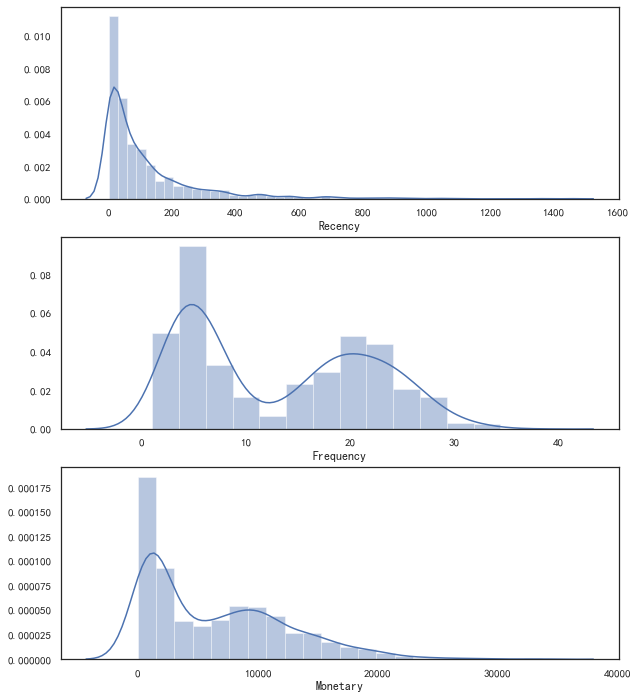

In [63]:
f,ax = plt.subplots(3,1,figsize=(10, 12))
plt.subplot(3,1,1); sns.distplot(RFM['Recency'],label='Recency')
plt.subplot(3,1,2); sns.distplot(RFM['Frequency'],label='Frequency')
plt.subplot(3,1,3); sns.distplot(RFM['Monetary'],label='Monetary')

K-means算法对数据的要求：
- 变量值是对称分布的
- 变量进行归一化处理，平均值和方差均相同

由R,F,M三个变量的分布图可知，变量值分布不满足对称性，使用对数变换解决

### 数据预处理
#### 对数转换

In [64]:
RFM_log = RFM[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(2)

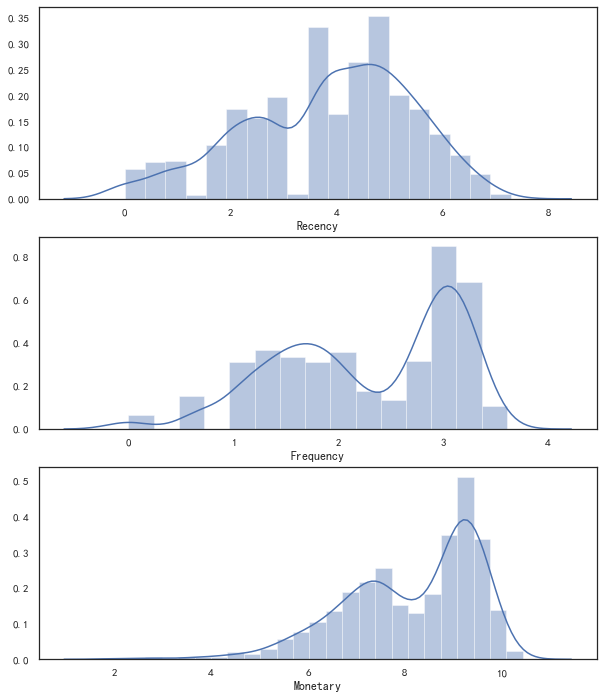

In [65]:
f,ax=plt.subplots(3,1,figsize=(10,12))
plt.subplot(3,1,1); sns.distplot(RFM_log['Recency'], label='Recency')
plt.subplot(3,1,2); sns.distplot(RFM_log['Frequency'], label='Frequency')
plt.subplot(3,1,3); sns.distplot(RFM_log['Monetary'],label='MemoryError')

#### 标准化处理

In [66]:
from sklearn.preprocessing import StandardScaler
RFM_normalization = StandardScaler().fit_transform(RFM_log)

### 选择聚类数目
通常有两种方法，一是肘部法则(Elbow Criterion method)，选择代价函数下降的显著转折点；二是业务经验

这里使用肘部法则进行K值选择，并且使用Calinski-Harabasz Index和TSNE降维可视化分析进行评估

In [67]:
from sklearn.cluster import KMeans
# K值的选择,1-8
ks = range(1,9)
inertias=[]
for k in ks:
    kc=KMeans(n_clusters=k, init='k-means++', random_state=1)
    kc.fit(RFM_normalization)
    inertias.append(kc.inertia_) # 样本距离其聚类中心的距离平方和
    print('k=',k,'迭代次数',kc.n_iter_)


k= 1 迭代次数 2
k= 2 迭代次数 6
k= 3 迭代次数 5
k= 4 迭代次数 7
k= 5 迭代次数 19
k= 6 迭代次数 16
k= 7 迭代次数 16
k= 8 迭代次数 8


Text(0.5, 1.0, 'Elbow criter method to find best k')

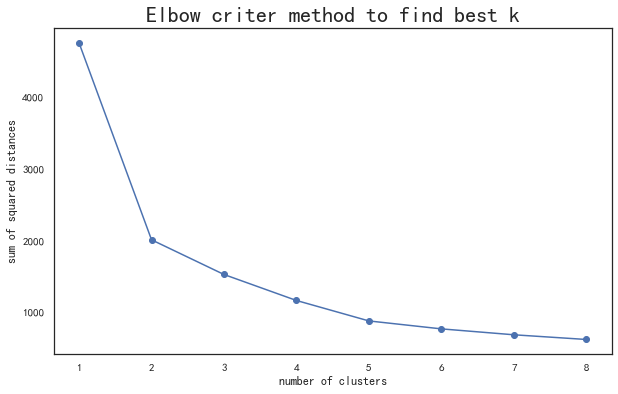

In [68]:
# 绘制每个K值对应的inertia_

f,ax=plt.subplots(figsize=(10,6))
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distances')
plt.title('Elbow criter method to find best k',fontsize=22)

根据肘部法则定理，可以看到当k=2，5时，代价函数下降会有一个显著转折点，接下来计算K=2和K=5时Calinski-Harabasz Index对应的值

In [69]:
from sklearn import metrics
kk = range(2,9)
for k in kk:
    y_pred = KMeans(n_clusters=k, random_state=1).fit_predict(RFM_normalization) #k必须大于1
    calinski = metrics.calinski_harabaz_score(RFM_normalization, y_pred)
    print('k:',k,' calinski=',calinski)

k: 2  calinski= 2164.1320715286606
k: 3  calinski= 1675.553797895975
k: 4  calinski= 1628.7944619946973
k: 5  calinski= 1745.833260283484
k: 6  calinski= 1642.9884099975727
k: 7  calinski= 1564.6319373616668
k: 8  calinski= 1505.5883077547091


k=2时，calinski_harabaz_scores是最大的，其次是k=5。结合业务而言，如果将用户分成两类，精确度不够高，因此接下来选择k=5进行接下来的验证

### 模型计算

In [70]:
kc = KMeans(n_clusters=5, random_state=1)
kc.fit(RFM_normalization)
# 每个样本对应的类簇标签，顺序与样本原始顺序一致
RFM['K-means_label'] = kc.labels_
RFM.head()

,CustomerID,Recency,Frequency,Monetary,K-means_label
0,AA-10315,9,18,13372.93300,4
1,AA-10375,7,19,4363.20600,4
2,AA-10480,230,14,13365.24028,3
3,AA-10645,38,32,14062.11070,3
4,AA-315,3,5,1395.87600,1


### 组内特征

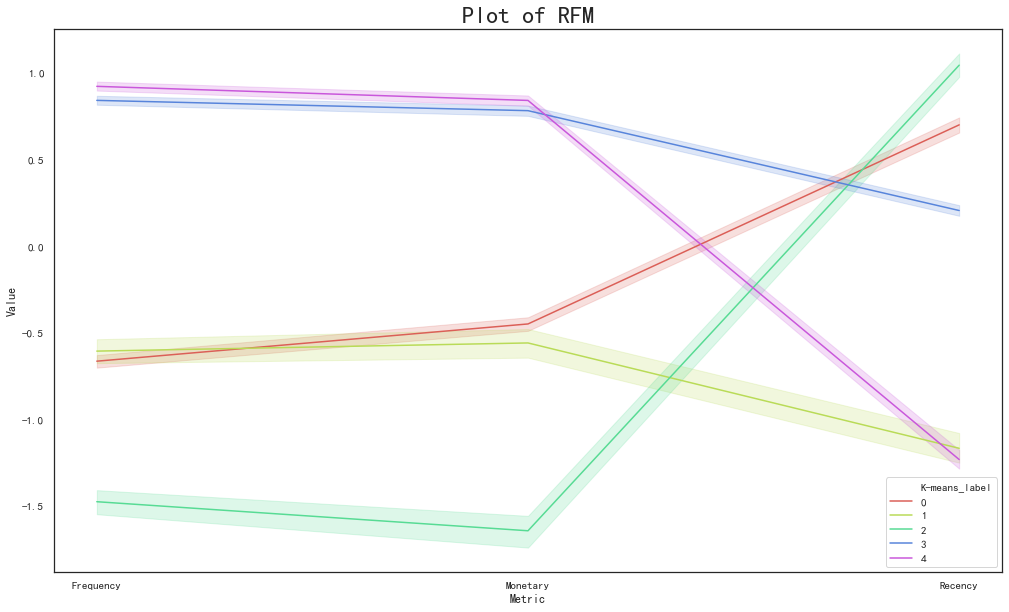

In [71]:
RFM_normalization1=pd.DataFrame(RFM_normalization, index=RFM.index, columns=['Recency', 'Frequency', 'Monetary'])
RFM_normalization1['K-means_label']=kc.labels_
RFM_melt=pd.melt(RFM_normalization1, id_vars=['K-means_label'],value_vars=['Recency', 'Frequency', 'Monetary'],
                 var_name='Metric',value_name='Value')

sns.lineplot(x = 'Metric', y = 'Value', hue = 'K-means_label',data = RFM_melt, palette=sns.color_palette("hls", 5))
plt.title("Plot of RFM",fontsize=24) #make title fontsize subtitle 
plt.show()

In [72]:
k_cluster =RFM.groupby(['K-means_label']).agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(2); k_cluster

Recency Frequency  Monetary      
                 mean      mean      mean count
K-means_label                                  
0              189.00      5.87   2188.40   413
1                9.93      6.23   1999.85   137
2              328.08      3.09    505.19   235
3               74.70     20.36  10836.68   426
4                9.08     21.69  11702.11   375

对于RFM模型而言，R越小越好，而F和M则越大越好。从图中5类用户可以看出：

- 0：平均消费次数为6次，平均消费金额2188，平均最近一次购买在半年左右
- 1：平均消费次数为6次，平均消费金额2000，平均最近一次购买在10天月左右
- 2: 平均消费次数为3次，平均消费金额505，平均最近一次购买在一年左右
- 3：平均消费次数为20次，平均消费金额1万余元，平均最近一次购买在两个半月左右
- 4：平均消费次数为21次，平均消费金额1万1千余元，平均最近一次购买在9天左右

比较符合实际用户层次划分消费情况

- 针对类别4的高价值用户，对其购物行为进行针对性分析，可以从以下几个方面进行，从而提供个性化得消费方案，形成智能商业模式。
    - 高价值用户的消费习惯(购物时段)
    - 购买的商品偏好
    - 购物种类的关联性（同时购买得产品）
- 同时需要警惕类别3的高价值用户的流失，但考虑到他们的购买频次，4年期间，20次，平均差不多就是两个半月购买一次的节奏，有可能是类别3是商品马上将要消耗殆尽，马上就会来采购的群体，但需警惕，可以采用DM营销等方式进行提醒和刺激

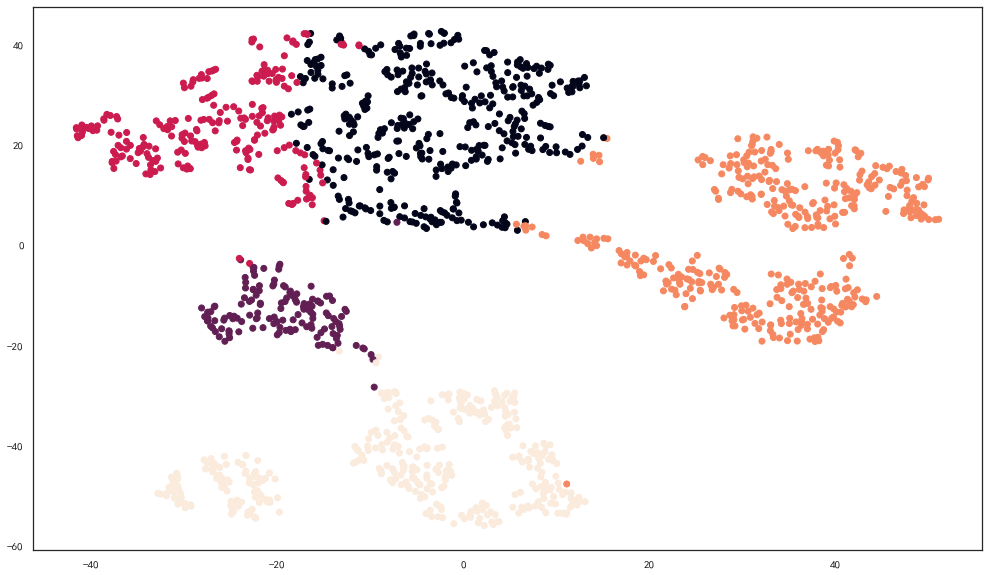

In [73]:
# TSNE降维
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(RFM_normalization)
k_range = KMeans(n_clusters=5, random_state=1)
k_range.fit(RFM_normalization)
cluster_labels = kc.labels_

plt.scatter(X_tsne[:, 0],X_tsne[:, 1], c=cluster_labels)
plt.show()

### 顾客分层结构分析
 - 用户画像
 - 价值用户对销售额的贡献

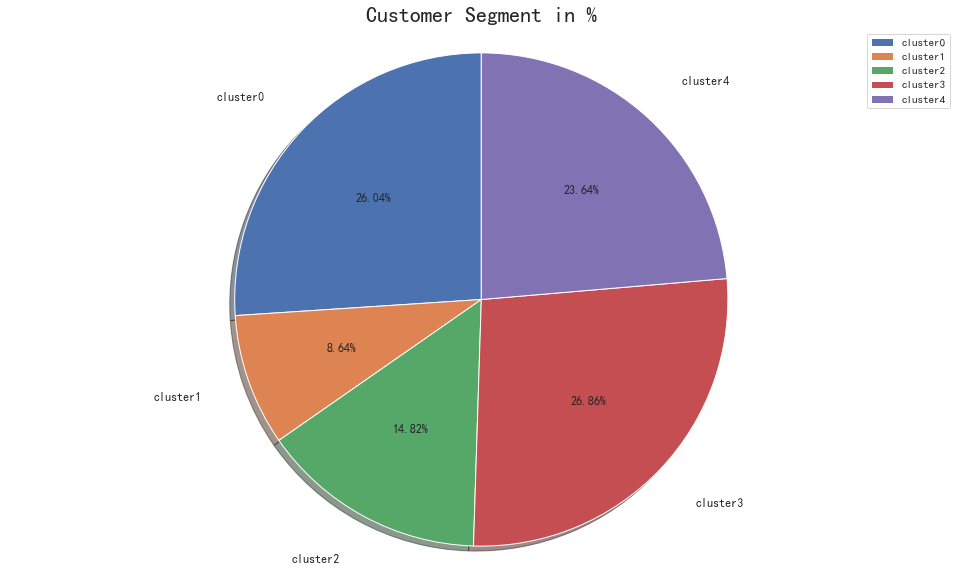

In [74]:
# 用户画像，不同用户占比
test=k_cluster['Monetary', 'count'].values
labels = [u'cluster0',u'cluster1',u'cluster2',u'cluster3',u'cluster4']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      autopct = '%2.2f%%',
                      labeldistance = 1.2,
                   
                      startangle=90,
                      textprops = {'fontsize':12},
                      pctdistance = 0.6,
                      shadow=True)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment in %',fontsize=22)
plt.show()

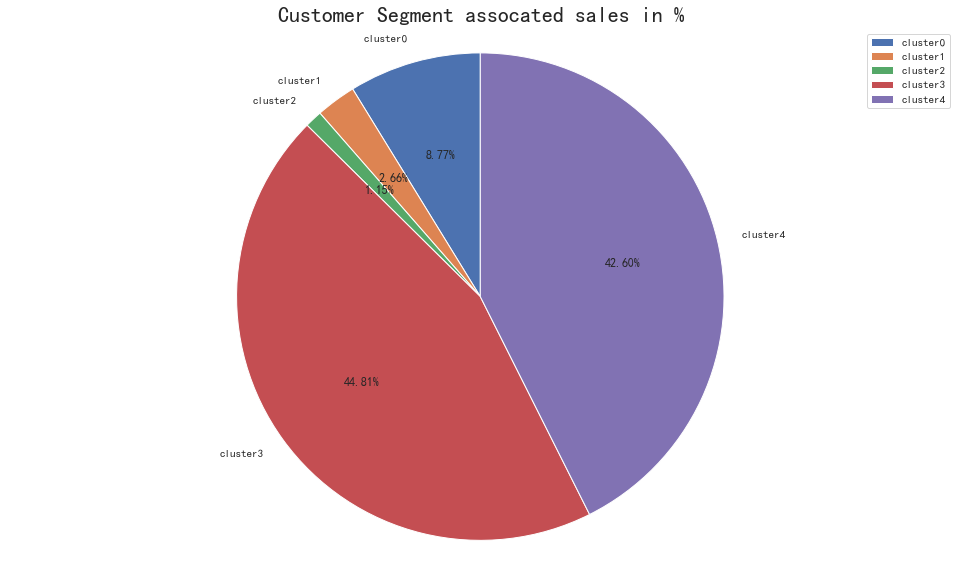

In [75]:
# 不同用户销售额占比
customer_sales=RFM.groupby('K-means_label').agg({'Monetary': 'sum'})
test=customer_sales.values
labels = [u'cluster0',u'cluster1',u'cluster2',u'cluster3',u'cluster4']

patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      autopct = '%2.2f%%',
                      labeldistance = 1.1,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6,
        )
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Customer Segment assocated sales in %',fontsize=22)
plt.show()

从上图可以看出：
- 销售额的主要来源是类别4和类别3的人群，他们人数占比50%，消费金额占比88%左右
- 可见此超市是有一群固定的高价值客户来稳定消费，粉丝群体稳定，而且占比大，需要针对他们提供个性化方案，预防流失。

# 总结

本次分析利用Python语言对电子零售数据进行了数据挖掘和分析，计算分析主要有两个方面：

（1）描述统计分析：

    通过描述统计分析，我们了解了该电子商务公司的整体运营情况，计算了年销售额及增长率、月均销售额和同比、年利润及增长率、月均销售额和同比、客单价、连带率，通过这些指标我们了解到该超市的销售额逐年增长很快，但利润波动较大，同时不同市场经营状况差异明显，亚太地区、欧盟、美国、拉丁美洲是重点关注区域，其他市场可以根据实际情况进行取舍。
  

（2）使用了标准RFM模型以及K-Means机器学习算法挖掘价值用户：

    为了挖掘价值用户，我们使用了两种方法，第一个方法是利用RFM模型对用户进行评分分组，第二个方法是利用K-Means算法对用户进行“机器学习”分组，两种方法都挖掘出价值用户，比较两种方法得出的用户画像结果，K-Means方法得出的结果更好一些，最终挖掘出的价值用户占比50%，贡献了88%的销售额。

确定价值用户之后可以进一步学习价值用户的消费习惯，从而提供以消费者为中心的智能商业模式，根据实际应用情况进行多次迭代来优化价值用户挖掘的模型。